# Imported Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.cm as cm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import classification_report,\
    confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.datasets import make_classification
from matplotlib.patches import Patch
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean, sqrt, absolute
from scipy.stats import t

# READ DATA

In [ ]:
# Read in the data
file = '/content/data6.xls'
df = pd.read_excel(file, engine='xlrd')
df.replace('.', np.nan, inplace=True)

# Explicitly call infer_objects
df = df.infer_objects()

# Remove the 'brthord' column
df.drop(columns=['brthord'], inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Print the DataFrame
print(df)
sns.set_style("whitegrid")


     wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0     769     40   93   35    12     11       2   31        1      0      0   
1     808     50  119   41    18     11      16   37        1      0      0   
2     825     40  108   46    14     11       9   33        1      0      0   
3     650     40   96   32    12     13       7   32        1      0      0   
4     562     40   74   27    11     14       5   34        1      0      0   
..    ...    ...  ...  ...   ...    ...     ...  ...      ...    ...    ...   
924  1442     40  113   45    16      8      10   35        1      0      1   
925   645     45   93   39    12     11       3   35        1      0      1   
928   477     45  100   33    12      9       3   31        1      0      1   
929   664     60   82   30    16     10       9   34        1      1      1   
931  1202     40  102   32    13     10       3   31        1      0      1   

     urban  sibs  meduc  feduc     lwage  
0       

<ipython-input-2-765ea0a87cb7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('.', np.nan, inplace=True)


# Converting dataset to numeric

In [ ]:
# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Create 'peduc' column
df['peduc'] = df['meduc'] + df['feduc']
print(df)

#Create 'cognitive'column
scaler = StandardScaler()
df[['IQ_std', 'KWW_std']] = scaler.fit_transform(df[['IQ', 'KWW']])
df['cognitive'] = (df['IQ_std'] + df['KWW_std'])/2


# checking missing values in the data
print(df.isnull().sum())

     wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0     769     40   93   35    12     11       2   31        1      0      0   
1     808     50  119   41    18     11      16   37        1      0      0   
2     825     40  108   46    14     11       9   33        1      0      0   
3     650     40   96   32    12     13       7   32        1      0      0   
4     562     40   74   27    11     14       5   34        1      0      0   
..    ...    ...  ...  ...   ...    ...     ...  ...      ...    ...    ...   
924  1442     40  113   45    16      8      10   35        1      0      1   
925   645     45   93   39    12     11       3   35        1      0      1   
928   477     45  100   33    12      9       3   31        1      0      1   
929   664     60   82   30    16     10       9   34        1      1      1   
931  1202     40  102   32    13     10       3   31        1      0      1   

     urban  sibs  meduc  feduc     lwage  peduc  
0

# Checking combination of peduc and cognitive - WALD TEST

In [ ]:
#fit multiple linear regression model
results = smf.ols('lwage ~ meduc + feduc', df).fit()

#perform Wald Test to determine if 'meduc' and 'feduc' coefficients are equal
print(results.wald_test('(feduc = meduc)'))

<F test: F=array([[0.00563046]]), p=0.9402066362571544, df_denom=719, df_num=1>


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


COMMENT FOR WALD TEST
Since the p-value is 0.94 is greater than 0.05, it suggests that the coefficients for meduc and feduc are not significantly different, so we can combine both variables into peduc

# Histograms & Scatter plots

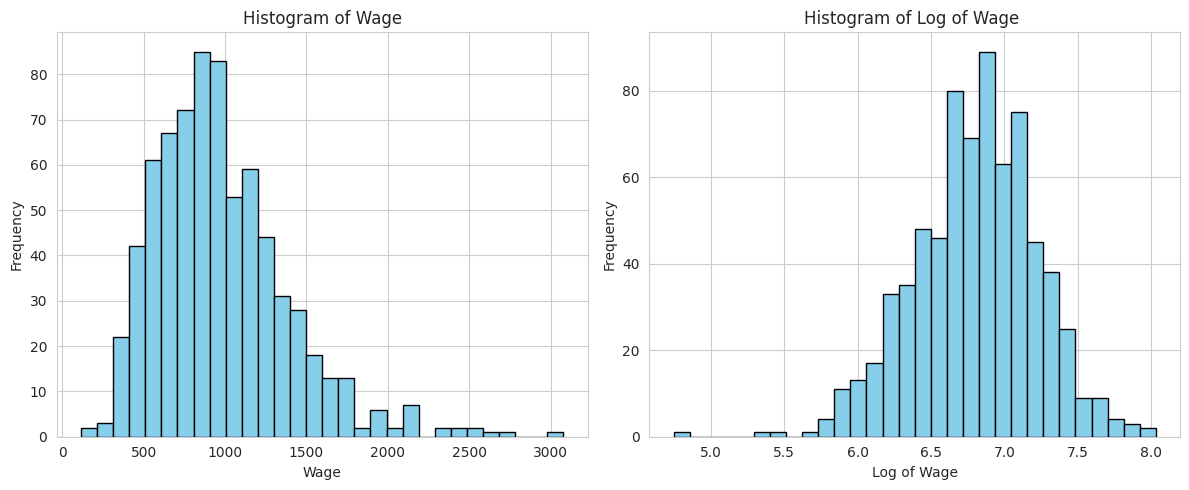

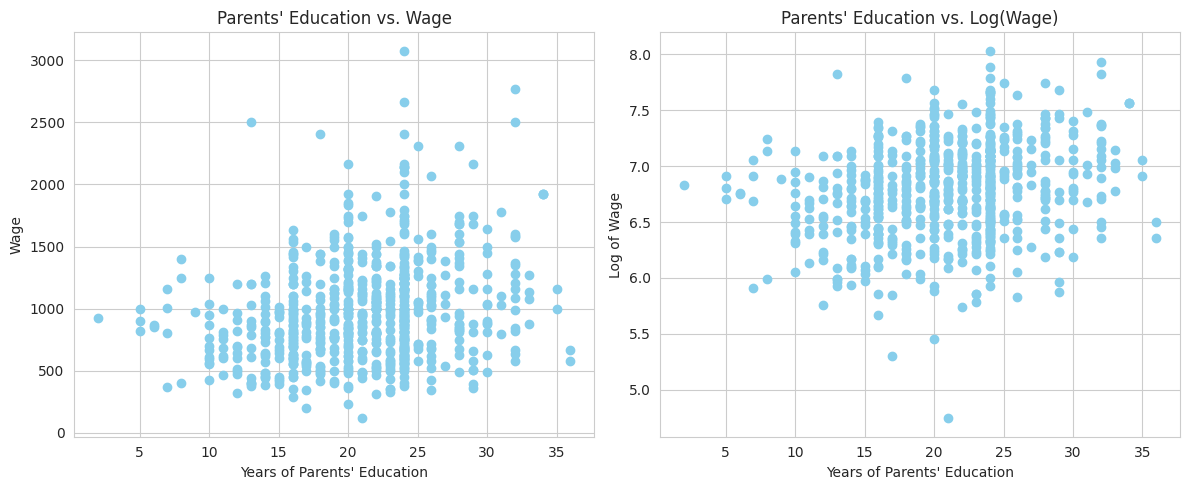

In [ ]:
# 1. Two histograms (log(wage) and wage) side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].hist(df["wage"].dropna(), bins=30, color="skyblue", edgecolor="black")
axes[0].set_title("Histogram of Wage")
axes[0].set_xlabel("Wage")
axes[0].set_ylabel("Frequency")

axes[1].hist(df["lwage"].dropna(), bins=30, color="skyblue", edgecolor="black")
axes[1].set_title("Histogram of Log of Wage ")
axes[1].set_xlabel("Log of Wage")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 2. Two scatter plots wage vs. parents' education and log of wage vs. patrents' education side by side
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes2[0].scatter(df["peduc"], df["wage"], color="skyblue")
axes2[0].set_title("Parents' Education vs. Wage")
axes2[0].set_xlabel("Years of Parents' Education")
axes2[0].set_ylabel("Wage")

axes2[1].scatter(df["peduc"], df["lwage"], color="skyblue")
axes2[1].set_title("Parents' Education vs. Log(Wage)")
axes2[1].set_xlabel("Years of Parents' Education")
axes2[1].set_ylabel("Log of Wage")
plt.tight_layout()
plt.show()

# Descriptive Statistics

In [ ]:
print(df[["wage","lwage","IQ","KWW","educ","exper","tenure","age","peduc"]].describe())

              wage       lwage          IQ         KWW        educ  \
count   722.000000  722.000000  722.000000  722.000000  722.000000   
mean    977.098338    6.799923  102.117729   35.875346   13.663435   
std     408.092199    0.419385   14.771819    7.678959    2.236755   
min     115.000000    4.744932   54.000000   12.000000    9.000000   
25%     684.000000    6.527958   93.000000   31.000000   12.000000   
50%     923.000000    6.827629  103.000000   37.000000   13.000000   
75%    1200.000000    7.090077  112.000000   41.000000   16.000000   
max    3078.000000    8.032035  145.000000   56.000000   18.000000   

            exper      tenure         age       peduc  
count  722.000000  722.000000  722.000000  722.000000  
mean    11.333795    7.189751   32.900277   21.060942  
std      4.249265    5.024904    3.088348    5.450740  
min      1.000000    0.000000   28.000000    2.000000  
25%      8.000000    3.000000   30.000000   17.000000  
50%     11.000000    7.000000   3

# Correlation matrix

In [ ]:
# Correlation
df_corre_matrix = df[["wage","lwage","IQ","KWW","educ","exper","tenure","age","peduc","black","urban","sibs"]].corr().round(3)
print(df_corre_matrix)

         wage  lwage     IQ    KWW   educ  exper  tenure    age  peduc  black  \
wage    1.000  0.953  0.310  0.318  0.321  0.021   0.107  0.175  0.261 -0.168   
lwage   0.953  1.000  0.314  0.309  0.313  0.047   0.162  0.186  0.251 -0.179   
IQ      0.310  0.314  1.000  0.418  0.537 -0.217   0.029 -0.011  0.383 -0.341   
KWW     0.318  0.309  0.418  1.000  0.409  0.022   0.153  0.425  0.277 -0.244   
educ    0.321  0.313  0.537  0.409  1.000 -0.441  -0.039  0.039  0.452 -0.141   
exper   0.021  0.047 -0.217  0.022 -0.441  1.000   0.298  0.488 -0.241  0.016   
tenure  0.107  0.162  0.029  0.153 -0.039  0.298   1.000  0.287 -0.038 -0.071   
age     0.175  0.186 -0.011  0.425  0.039  0.488   0.287  1.000 -0.046 -0.070   
peduc   0.261  0.251  0.383  0.277  0.452 -0.241  -0.038 -0.046  1.000 -0.237   
black  -0.168 -0.179 -0.341 -0.244 -0.141  0.016  -0.071 -0.070 -0.237  1.000   
urban   0.209  0.219  0.034  0.107  0.082 -0.032  -0.023  0.006  0.095  0.077   
sibs   -0.137 -0.136 -0.275 

# Colourful correlation matrix

In [ ]:
# correlation matrix used for checking predictor variables in multiple LRM
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# # Model with categorical variable MARRIED

# X1 = sm.add_constant(df[['peduc', 'married']])
# model1 = sm.OLS(df['lwage'], X1).fit()
# print(model1.summary())

# print(" ")

# # Model with interaction term
# df['peduc_married'] = df['peduc'] * df['married']
# X2 = sm.add_constant(df[['peduc', 'married', 'peduc_married']])
# model2 = sm.OLS(df['lwage'], X2).fit()
# print(model2.summary())

# # Predictions
# df['pred1'] = model1.predict(X1)
# df['pred2'] = model2.predict(X2)

# # Plot
# # plt.figure(figsize=(10, 6))
# # sns.scatterplot(x='peduc', y='lwage', hue='married', data=df, palette='deep')
# # sns.lineplot(x='peduc', y='pred1', hue='married', data=df, palette='deep', linestyle='--')
# # sns.lineplot(x='peduc', y='pred2', hue='married', data=df, palette='deep')
# # plt.title('Linear Regression with Categorical Variable and Interaction Term')
# # plt.xlabel('Parents\' Education (peduc)')
# # plt.ylabel('Log of Wage (lwage)')
# # plt.legend(title='Married')
# # plt.show()


In [ ]:
# # Model with categorical variable URBAN

# X1 = sm.add_constant(df[['peduc', 'urban']])
# model1 = sm.OLS(df['lwage'], X1).fit()
# print(model1.summary())

# print(" ")

# # Model with interaction term
# df['peduc_urban'] = df['peduc'] * df['urban']
# X2 = sm.add_constant(df[['peduc', 'urban', 'peduc_urban']])
# model2 = sm.OLS(df['lwage'], X2).fit()
# print(model2.summary())

# # Predictions
# df['pred1'] = model1.predict(X1)
# df['pred2'] = model2.predict(X2)

# # Plot
# # plt.figure(figsize=(10, 6))
# # sns.scatterplot(x='peduc', y='lwage', hue='urban', data=df, palette='deep')
# # sns.lineplot(x='peduc', y='pred1', hue='urban', data=df, palette='deep', linestyle='--')
# # sns.lineplot(x='peduc', y='pred2', hue='urban', data=df, palette='deep')
# # plt.title('Linear Regression with Categorical Variable and Interaction Term')
# # plt.xlabel('Parents\' Education (peduc)')
# # plt.ylabel('Log of Wage (lwage)')
# # plt.legend(title='urban')
# # plt.show()


In [ ]:
# # Model with categorical variable BLACK

# X1 = sm.add_constant(df[['peduc', 'black']])
# model1 = sm.OLS(df['lwage'], X1).fit()
# print(model1.summary())

# print(" ")

# # Model with interaction term
# df['peduc_black'] = df['peduc'] * df['black']
# X2 = sm.add_constant(df[['peduc', 'black', 'peduc_black']])
# model2 = sm.OLS(df['lwage'], X2).fit()
# print(model2.summary())

# # Predictions
# df['pred1'] = model1.predict(X1)
# df['pred2'] = model2.predict(X2)

# # Plot
# # plt.figure(figsize=(10, 6))
# # sns.scatterplot(x='peduc', y='lwage', hue='black', data=df, palette='deep')
# # sns.lineplot(x='peduc', y='pred1', hue='black', data=df, palette='deep', linestyle='--')
# # sns.lineplot(x='peduc', y='pred2', hue='black', data=df, palette='deep')
# # plt.title('Linear Regression with Categorical Variable and Interaction Term')
# # plt.xlabel('Parents\' Education (peduc)')
# # plt.ylabel('Log of Wage (lwage)')
# # plt.legend(title='black')
# # plt.show()


In [ ]:
# # Model with categorical variable SOUTH

# X1 = sm.add_constant(df[['peduc', 'south']])
# model1 = sm.OLS(df['lwage'], X1).fit()
# print(model1.summary())

# print(" ")

# # Model with interaction term
# df['peduc_south'] = df['peduc'] * df['south']
# X2 = sm.add_constant(df[['peduc', 'south', 'peduc_south']])
# model2 = sm.OLS(df['lwage'], X2).fit()
# print(model2.summary())

# # Predictions
# df['pred1'] = model1.predict(X1)
# df['pred2'] = model2.predict(X2)

# # Plot
# # plt.figure(figsize=(10, 6))
# # sns.scatterplot(x='peduc', y='lwage', hue='south', data=df, palette='deep')
# # sns.lineplot(x='peduc', y='pred1', hue='south', data=df, palette='deep', linestyle='--')
# # sns.lineplot(x='peduc', y='pred2', hue='south', data=df, palette='deep')
# # plt.title('Linear Regression with Categorical Variable and Interaction Term')
# # plt.xlabel('Parents\' Education (peduc)')
# # plt.ylabel('Log of Wage (lwage)')
# # plt.legend(title='south')
# # plt.show()


# TRAINING DATA & TESTING DATA

In [ ]:
y = df['lwage']
X = df[['peduc','educ', 'exper', 'IQ', 'urban','married','tenure','age','black','sibs','KWW','hours','south', 'cognitive']]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state = 123)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (577, 14)
Testing set size: (145, 14)


# SIMPLE LINEAR REGRESSION MODEL

In [ ]:
#fit simple linear regression model
X_train_sel = X_train[['peduc']]
X_train_sel = sm.add_constant(X_train_sel)
model = sm.OLS(y_train, X_train_sel).fit()

print(model.summary())
print("  ")

#perform Bresuch-Pagan test
print("Breusch-Pagan test:")
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
print(lzip(names, test))
print("    ")

# perform Ramsey RESET test for functional form misspecification
reset_test = linear_reset(res=model, power=2, test_type="fitted", use_f=True)

print("Ramsey RESET test:")
print('F-statistic:', reset_test.fvalue)
print('p-value:', reset_test.pvalue)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     33.76
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.03e-08
Time:                        16:57:07   Log-Likelihood:                -313.88
No. Observations:                 577   AIC:                             631.8
Df Residuals:                     575   BIC:                             640.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4091      0.069     93.188      0.0

# MULTIPLE LINEAR REGRESSION MODEL 1

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     23.53
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           2.26e-14
Time:                        16:57:07   Log-Likelihood:                -296.83
No. Observations:                 577   AIC:                             601.7
Df Residuals:                     573   BIC:                             619.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7738      0.127     45.575      0.0

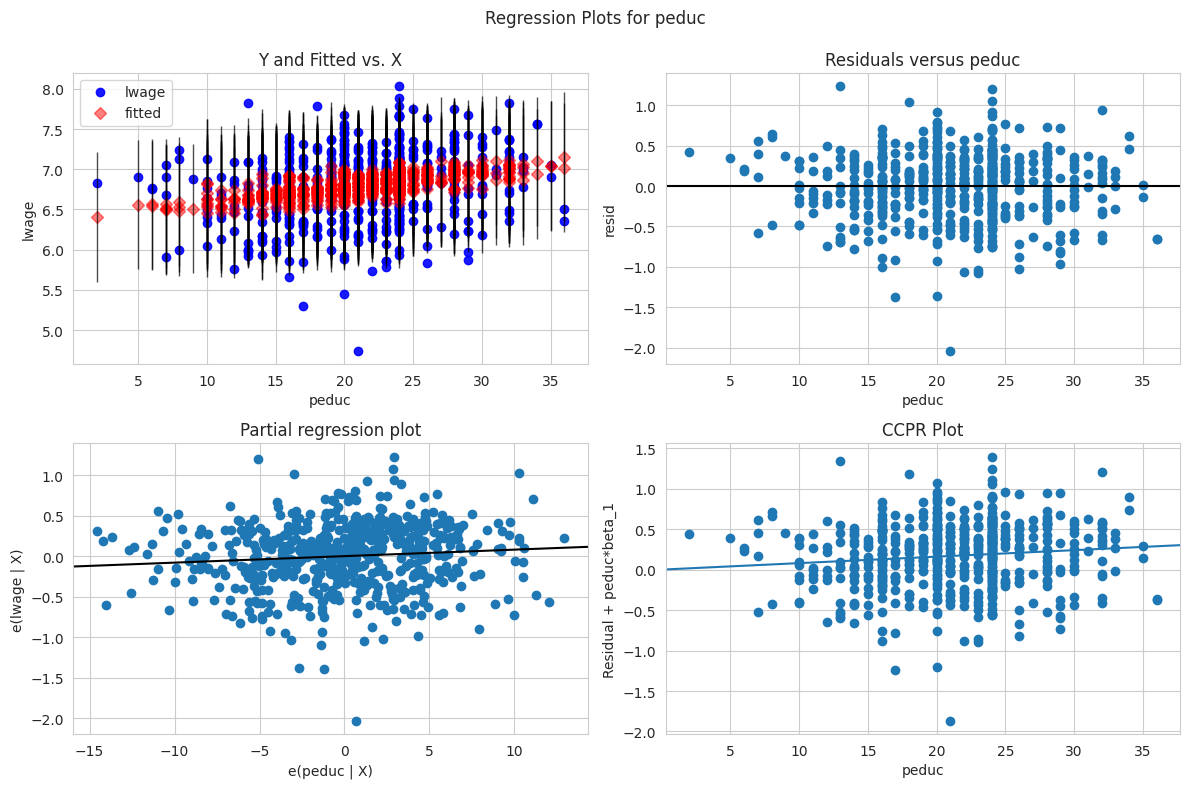

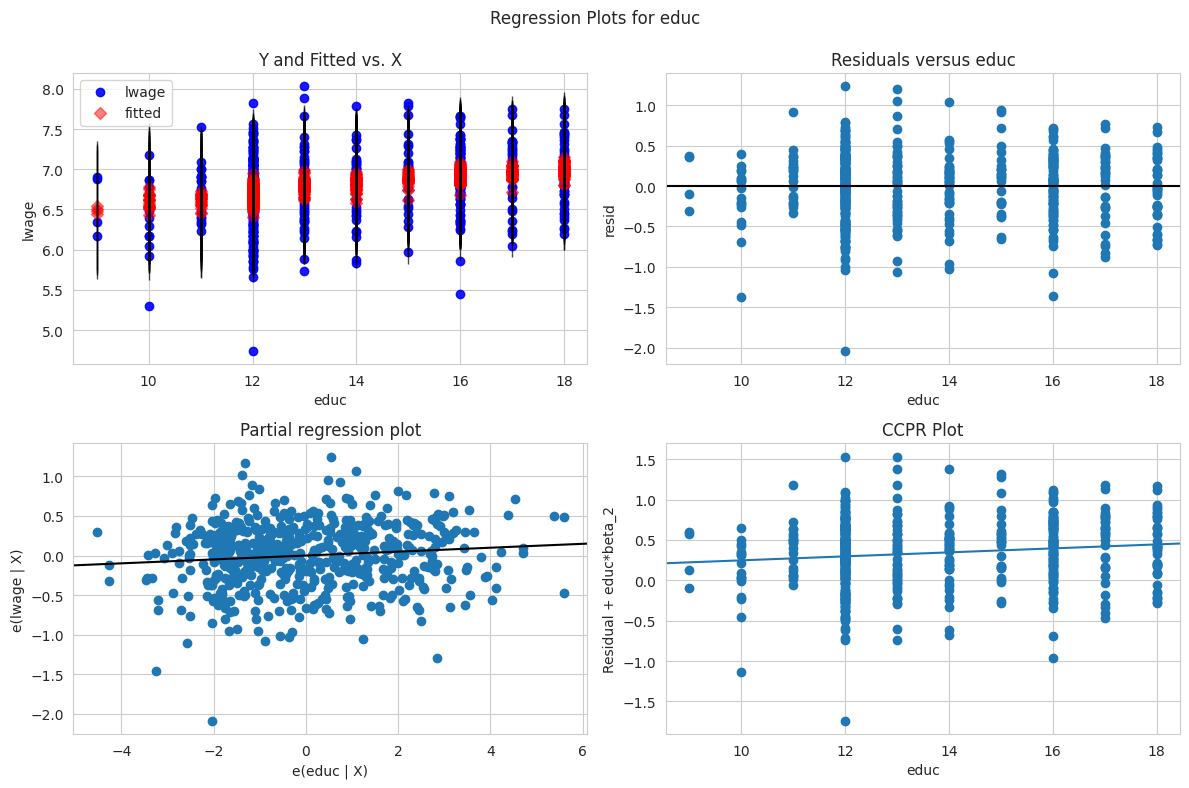

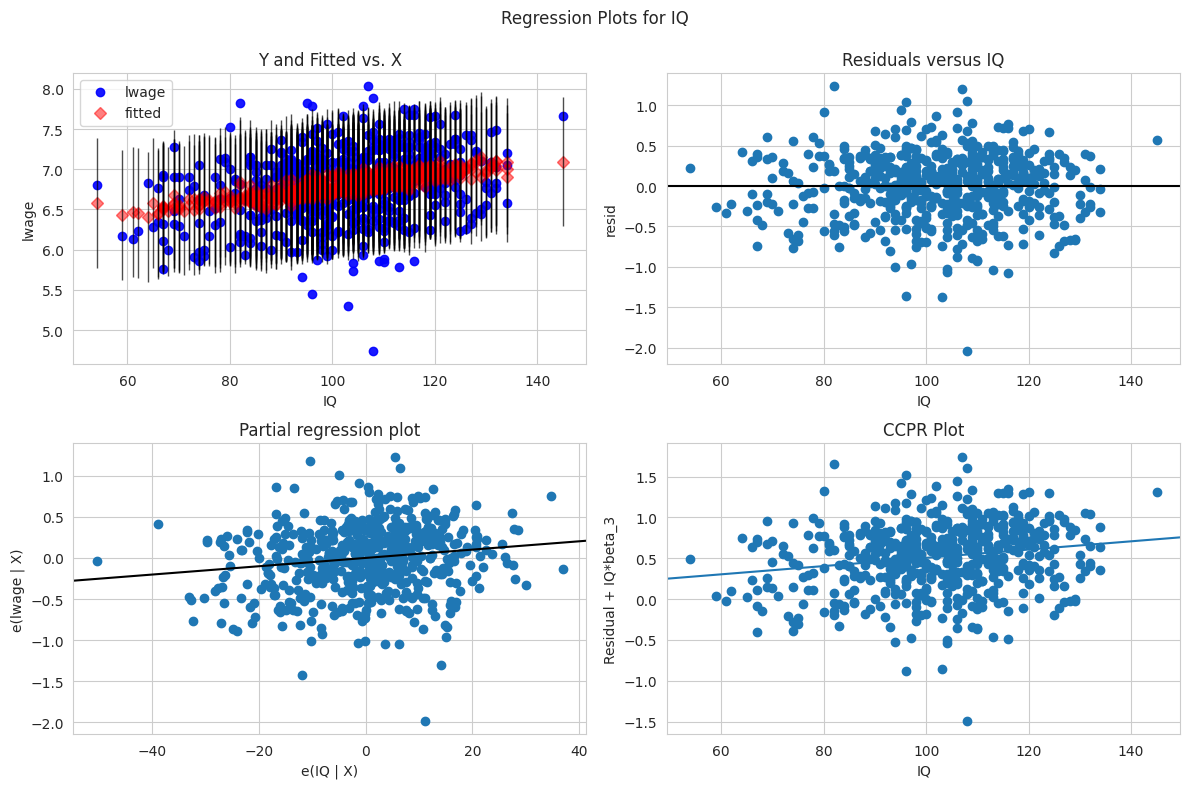

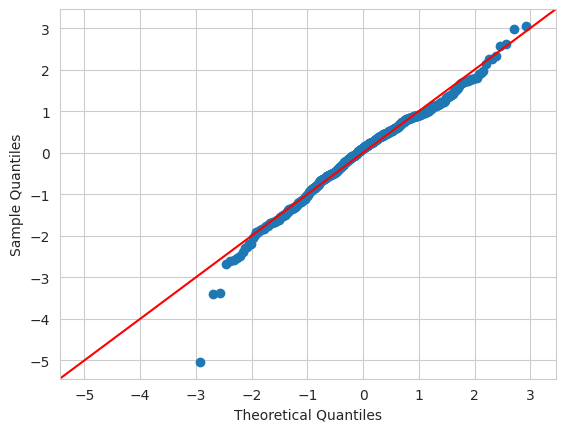

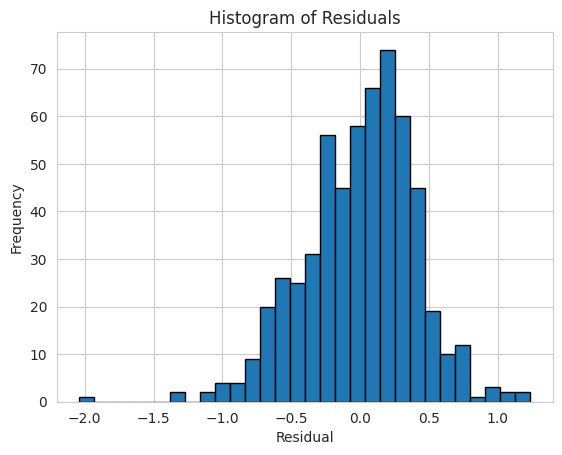

 
Jarque-Bera statistic: 50.351178747544076
p-value: 1.165146289082685e-11
Skewness: -0.4583745845808223
Kurtosis: 4.119777099590365


In [ ]:
# MULTIPLE LINEAR REGRESSION MODEL #1: adding education and cognitive var

X_train_sel1 = X_train[['peduc', 'educ', 'IQ']]
X_train_sel1 = sm.add_constant(X_train_sel1)
model1 = sm.OLS(y_train, X_train_sel1).fit()

print(model1.summary())
print(" ")
# ASSUMPTIONS

# Linearity
# Ramsey Reset test for linearity
model.fittedvalues = model1.fittedvalues.to_numpy()
reset_result = linear_reset(model1, power=2, use_f=True)
print("Ramsey RESET test (power=2):")
print("F-statistics: ", reset_result.fvalue)
print("p-value: ", reset_result.pvalue)

# Multicollinearity
X_train_vif = X_train[['peduc','educ','IQ']]
X_train_vif = sm.add_constant(X_train_vif)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i)
              for i in range(X_train_vif.shape[1])]
vif['variable'] = X_train_vif.columns
print(' ')
print(vif)
print(" ")

#Homoskedasticity
print("Breusch-Pagan test:")
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model1.resid, model1.model.exog)

print(lzip(names, test))

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, 'peduc', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, 'educ', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, 'IQ', fig=fig)

#Normality of residuals
res = model1.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

plt.hist(res, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

print(" ")

#jarque_bera test
jb_stat, jb_pvalue, skew, kurtosis = sm.stats.jarque_bera(res)

print("Jarque-Bera statistic:", jb_stat)
print("p-value:", jb_pvalue)
print("Skewness:", skew)
print("Kurtosis:", kurtosis)



# MULTIPLE LINEAR REGRESSION MODEL 2

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     26.86
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.93e-20
Time:                        16:57:17   Log-Likelihood:                -280.68
No. Observations:                 577   AIC:                             571.4
Df Residuals:                     572   BIC:                             593.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2043      0.158     32.880      0.0

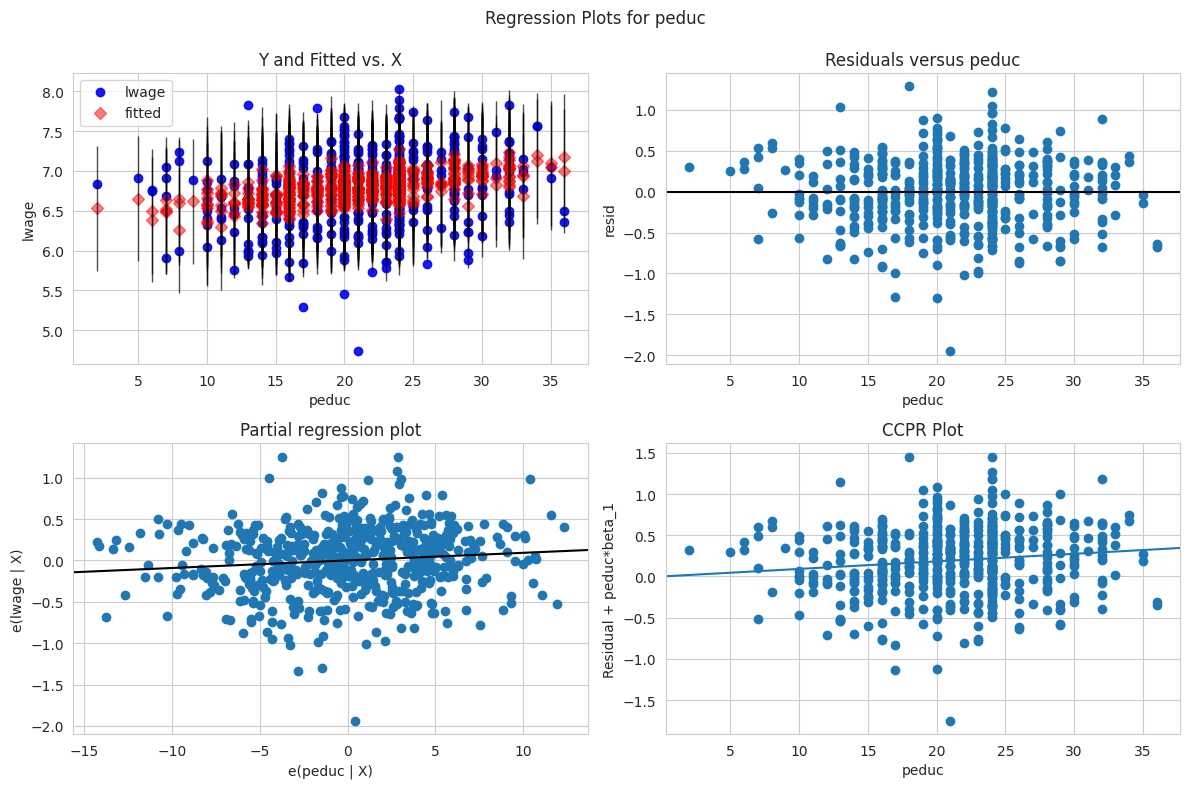

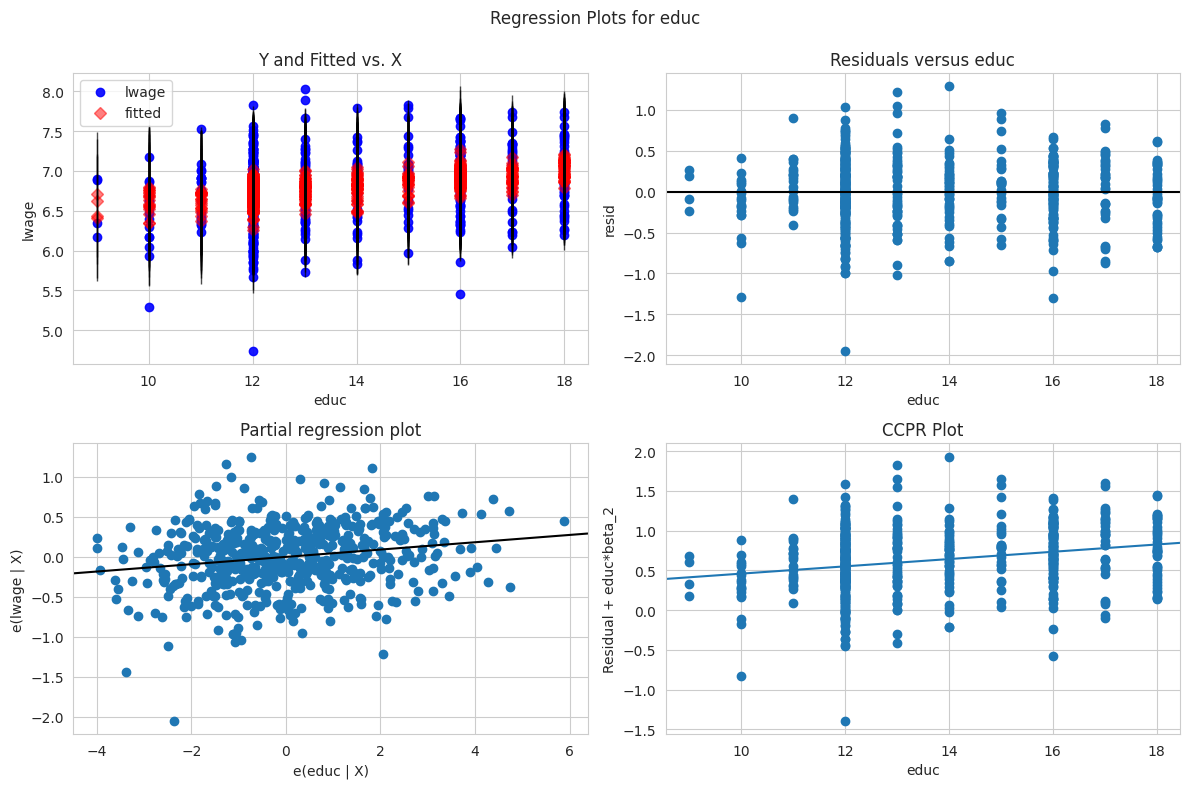

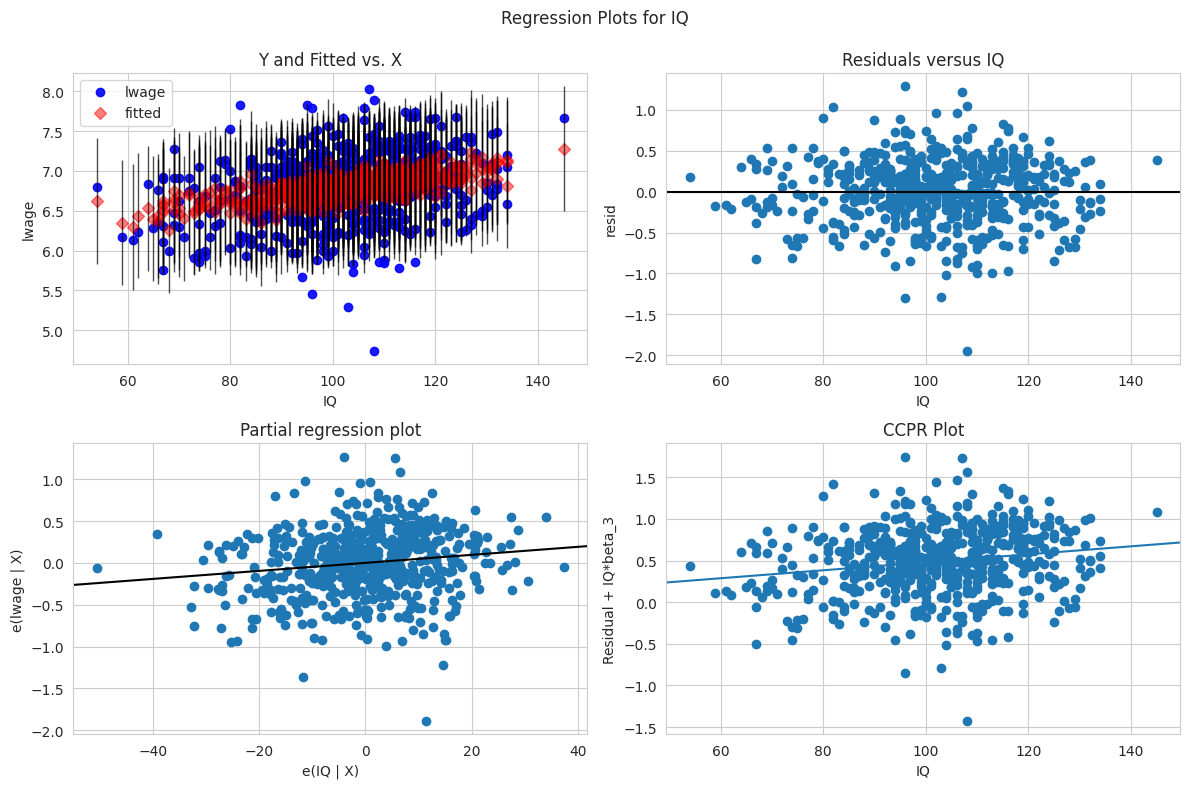

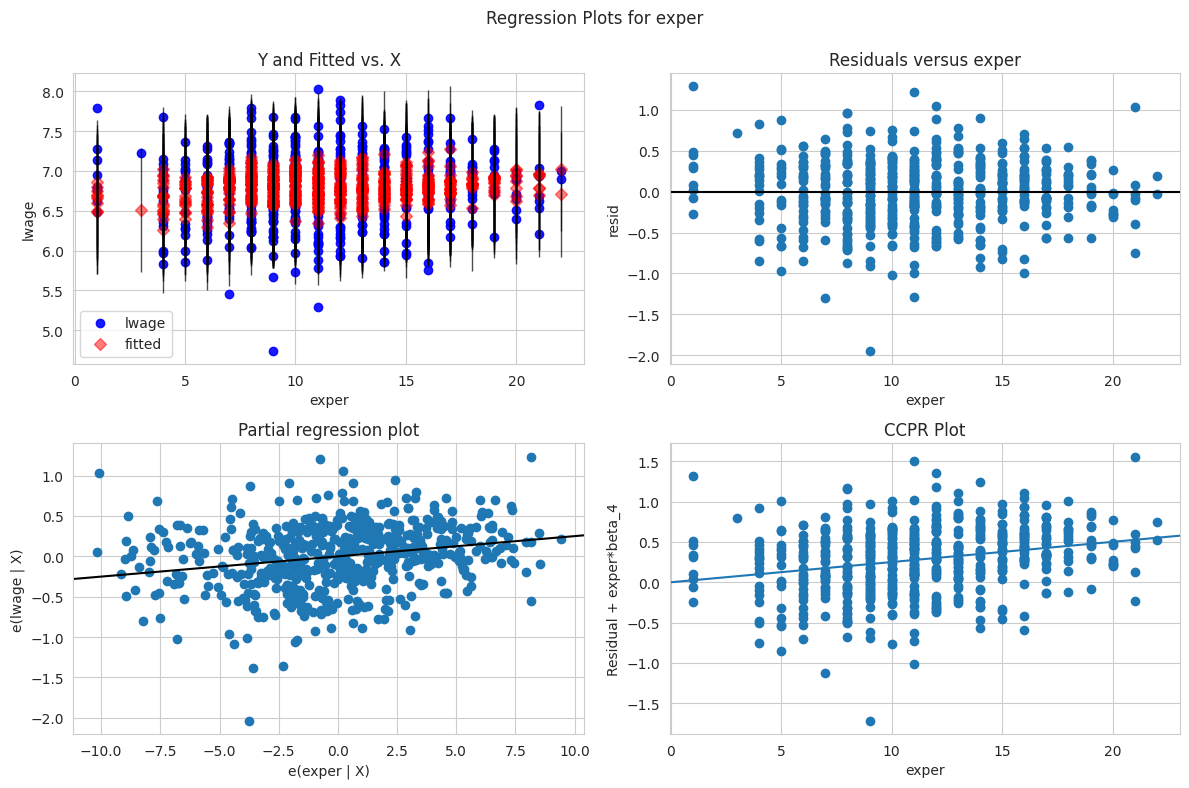

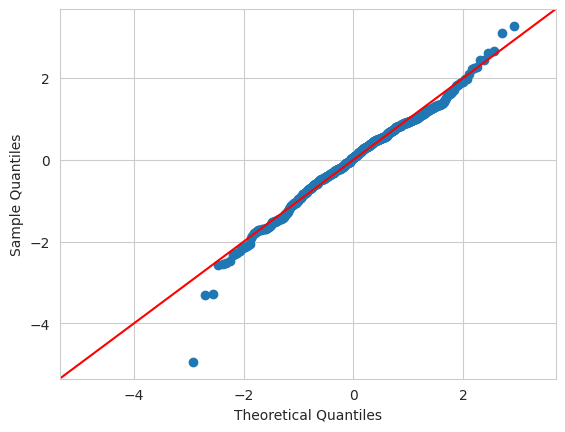

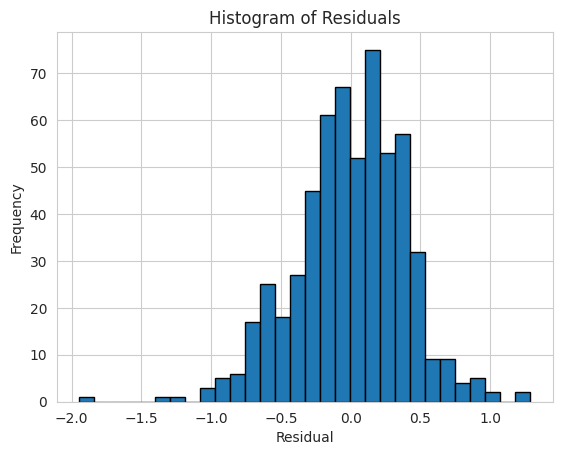

 
Jarque-Bera statistic: 42.50630715240533
p-value: 5.886710506191035e-10
Skewness: -0.36000578278529444
Kurtosis: 4.117859555623706


In [ ]:
# MULTIPLE LINEAR REGRESSION MODEL #2: adding years of experience

X_train_sel2 = X_train[['peduc','educ', 'IQ','exper']]
X_train_sel2 = sm.add_constant(X_train_sel2)
model2 = sm.OLS(y_train, X_train_sel2).fit()

print(model2.summary())
print(" ")

# ASSUMPTIONS

# Linearity
# Ramsey Reset test for linearity
model.fittedvalues = model2.fittedvalues.to_numpy()
reset_result = linear_reset(model2, power=2, use_f=True)
print("Ramsey RESET test (power=2):")
print("F-statistics: ", reset_result.fvalue)
print("p-value: ", reset_result.pvalue)

# Multicollinearity
X_train_vif = X_train[['peduc','educ','IQ','exper']]
X_train_vif = sm.add_constant(X_train_vif)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i)
              for i in range(X_train_vif.shape[1])]
vif['variable'] = X_train_vif.columns
print(' ')
print(vif)
print(" ")

#Homoskedasticity
print("Breusch-Pagan test:")
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model2.resid, model2.model.exog)
print(lzip(names, test))
print(" ")

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'peduc', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'educ', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'IQ', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'exper', fig=fig)

#Normality of residuals
res = model2.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

plt.hist(res, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

print(" ")

#jarque_bera test
jb_stat, jb_pvalue, skew, kurtosis = sm.stats.jarque_bera(res)

print("Jarque-Bera statistic:", jb_stat)
print("p-value:", jb_pvalue)
print("Skewness:", skew)
print("Kurtosis:", kurtosis)



# MULTIPLE LINEAR REGRESSION MODEL 3


                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     25.74
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           4.03e-27
Time:                        16:57:25   Log-Likelihood:                -261.17
No. Observations:                 577   AIC:                             536.3
Df Residuals:                     570   BIC:                             566.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9670      0.159     31.316      0.0

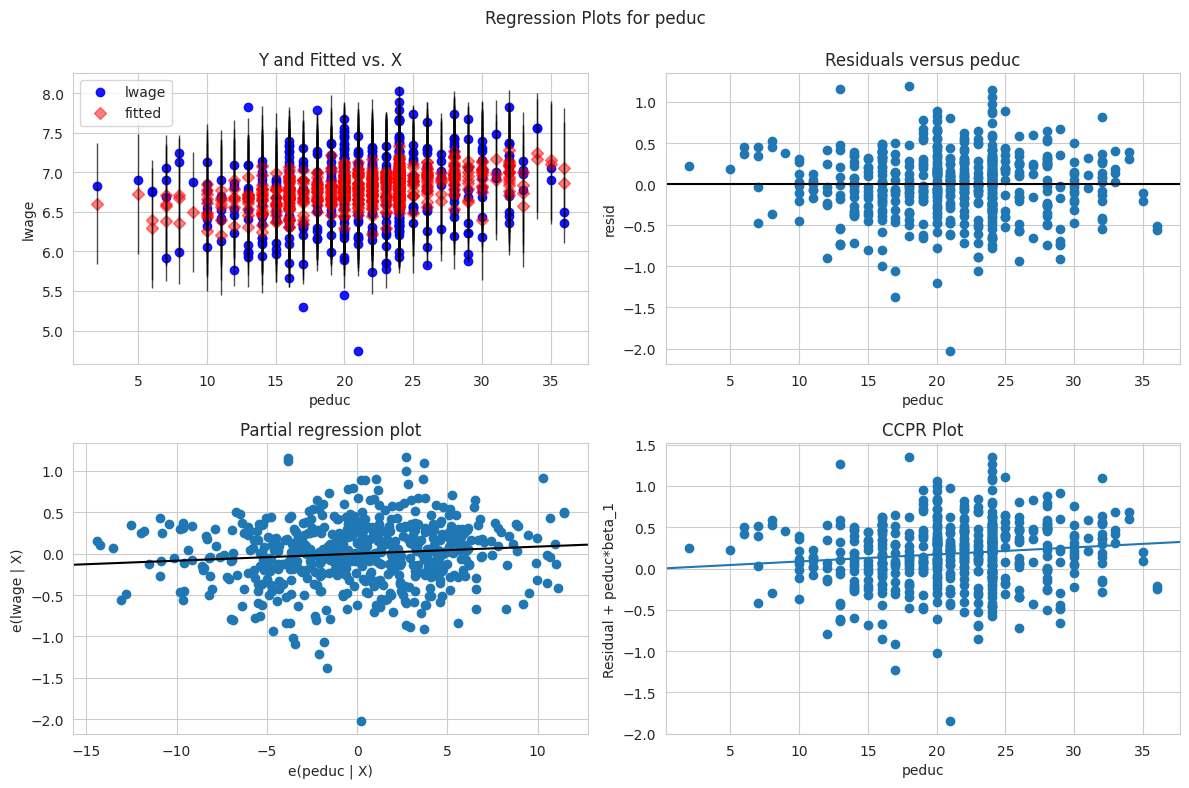

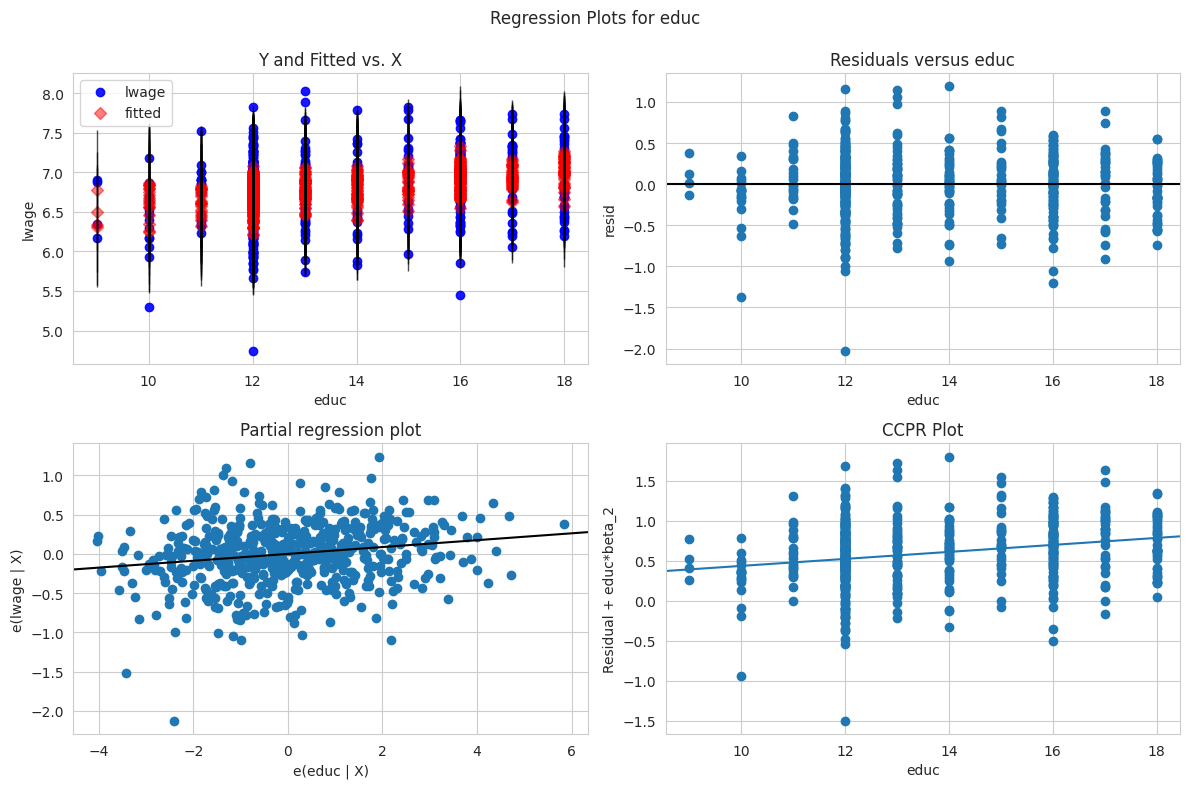

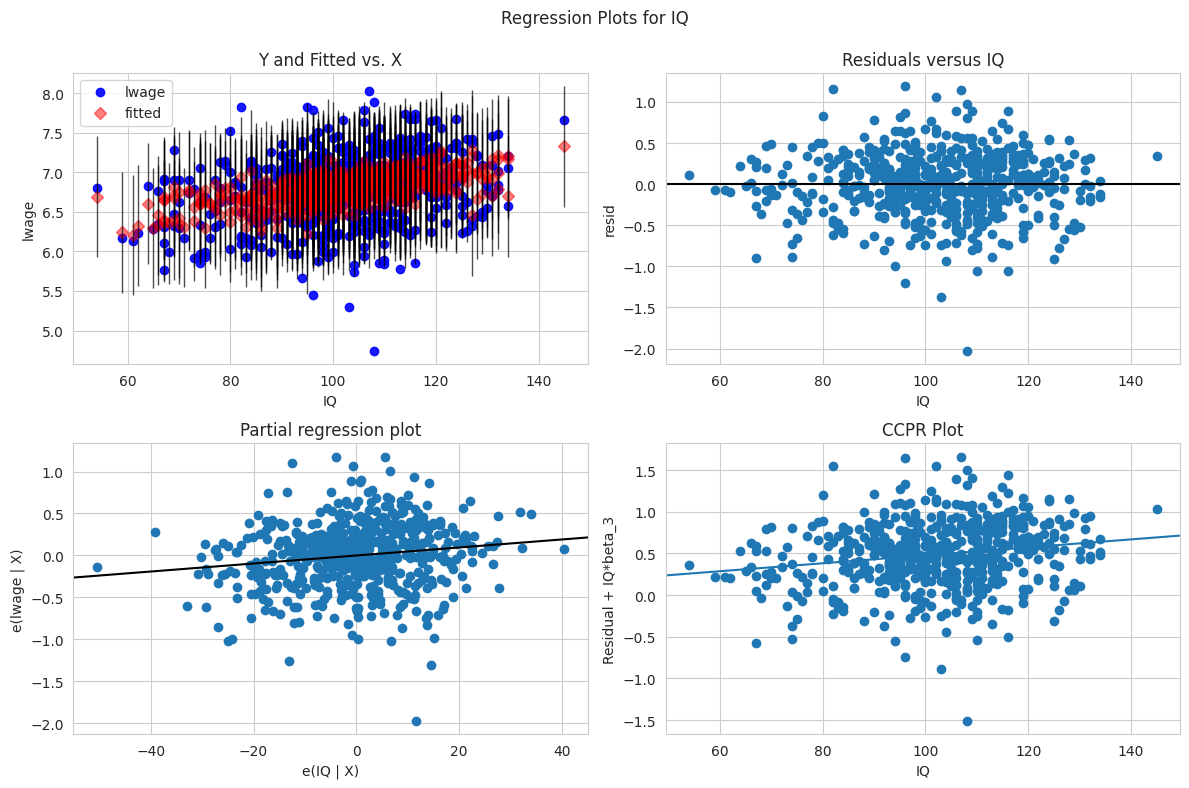

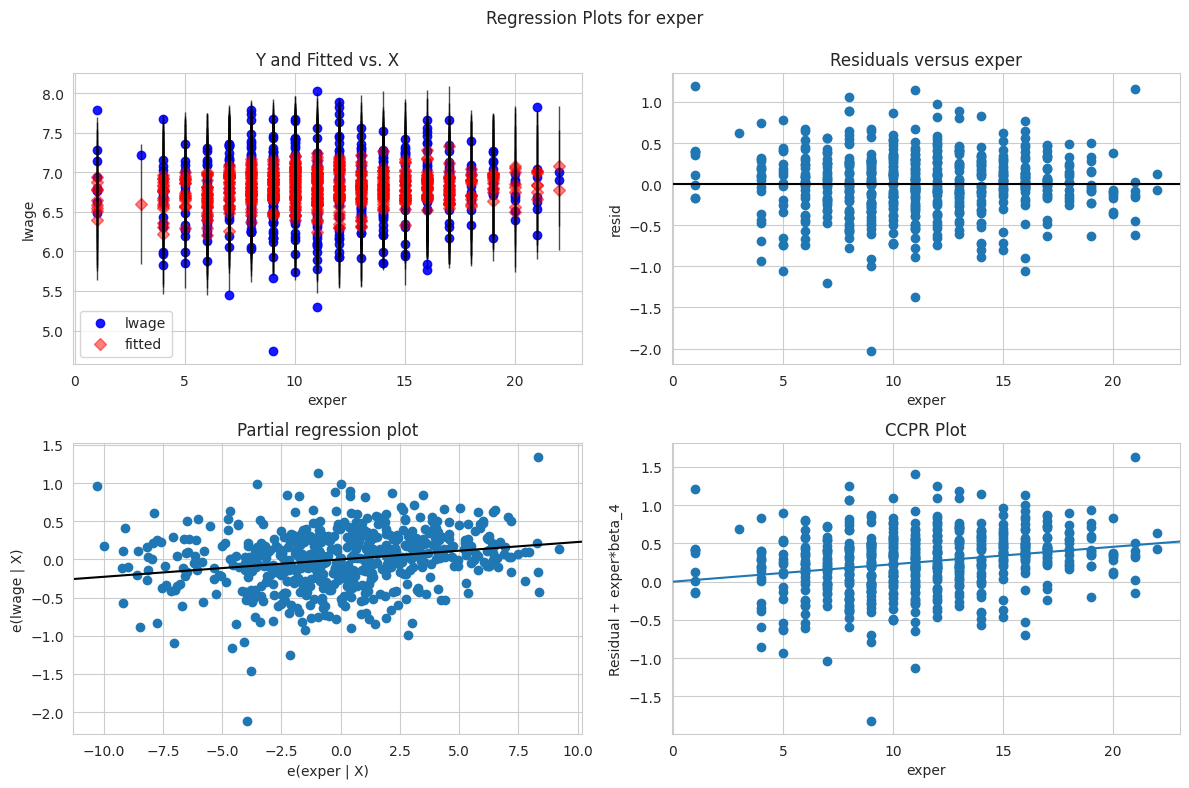

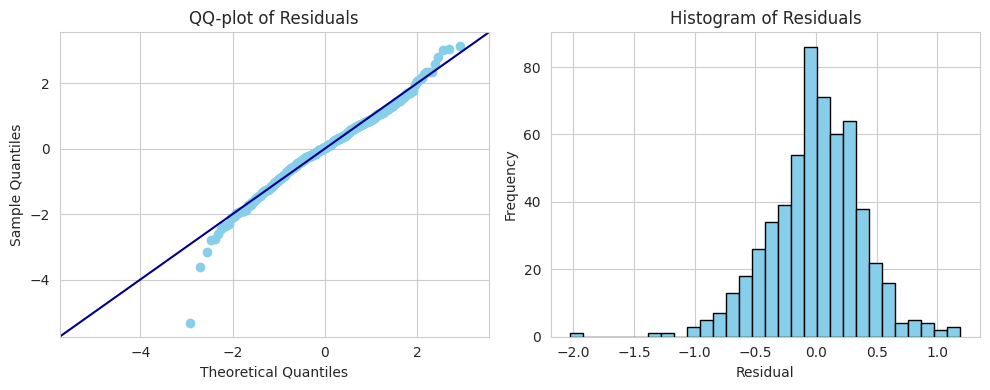

 
Jarque-Bera statistic: 84.4507090823921
p-value: 4.589459337273516e-19
Skewness: -0.39602342661221607
Kurtosis: 4.698629719108731
 


In [ ]:
# MULTIPLE LINEAR REGRESSION MODEL #3: adding personal info (urban & married)

X_train_sel3 = X_train[['peduc','educ','IQ','exper','urban','married']]
X_train_sel3 = sm.add_constant(X_train_sel3)
model3 = sm.OLS(y_train, X_train_sel3).fit()

print(model3.summary())
print(" ")

# ASSUMPTIONS

# Linearity
# Ramsey Reset test for linearity
model.fittedvalues = model3.fittedvalues.to_numpy()
reset_result = linear_reset(model3, power=2, use_f=True)
print("Ramsey RESET test (power=2):")
print("F-statistics: ", reset_result.fvalue)
print("p-value: ", reset_result.pvalue)

# Multicollinearity
X_train_vif = X_train[['peduc','educ','IQ','exper', 'urban', 'married']]
X_train_vif = sm.add_constant(X_train_vif)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i)
              for i in range(X_train_vif.shape[1])]
vif['variable'] = X_train_vif.columns
print(' ')
print(vif)
print(" ")

#Homoskedasticity
print("Breusch-Pagan test:")
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model3.resid, model3.model.exog)
print(lzip(names, test))
print(" ")

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model3, 'peduc', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model3, 'educ', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model3, 'IQ', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model3, 'exper', fig=fig)

#Normality of residuals
res = model3.resid
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# QQ-plot
sm.qqplot(res, fit=True, line="45", ax=ax[0])
ax[0].set_title("QQ-plot of Residuals")

# By default, statsmodels' qqplot creates two 'lines':
# [0] is the data points, [1] is the reference line.
qq_lines = ax[0].get_lines()
if len(qq_lines) >= 2:
    # Make the data points skyblue
    qq_points = qq_lines[0]
    qq_points.set_markerfacecolor("skyblue")
    qq_points.set_markeredgecolor("skyblue")

    # Change the reference line color
    qq_ref_line = qq_lines[1]
    qq_ref_line.set_color("darkblue")

# Histogram
ax[1].hist(res, bins=30, edgecolor='k',color='skyblue')
ax[1].set_title("Histogram of Residuals")
ax[1].set_xlabel("Residual")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
print(" ")

#jarque_bera test
jb_stat, jb_pvalue, skew, kurtosis = sm.stats.jarque_bera(res)

print("Jarque-Bera statistic:", jb_stat)
print("p-value:", jb_pvalue)
print("Skewness:", skew)
print("Kurtosis:", kurtosis)

print(" ")


# MULTIPLE LINEAR REGRESSION MODEL 4

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     22.39
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           8.73e-30
Time:                        16:57:31   Log-Likelihood:                -251.27
No. Observations:                 577   AIC:                             520.5
Df Residuals:                     568   BIC:                             559.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8330      0.198     29.461      0.0

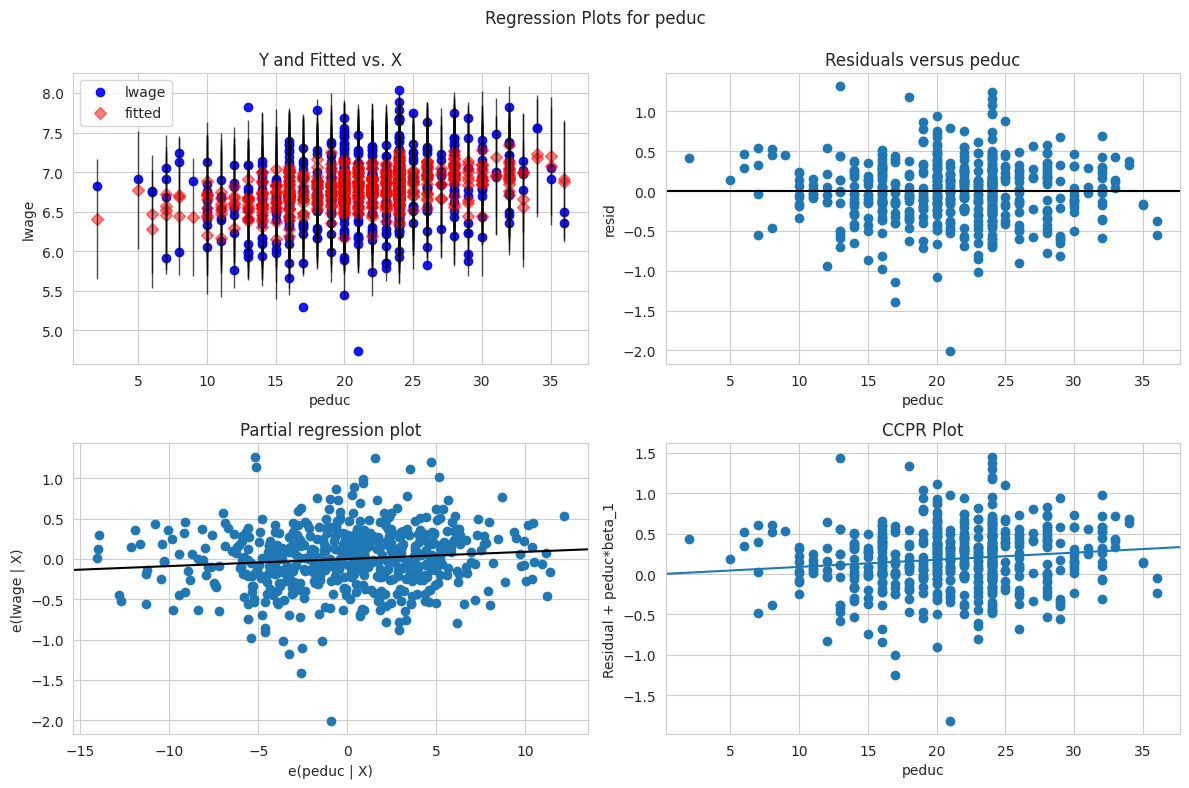

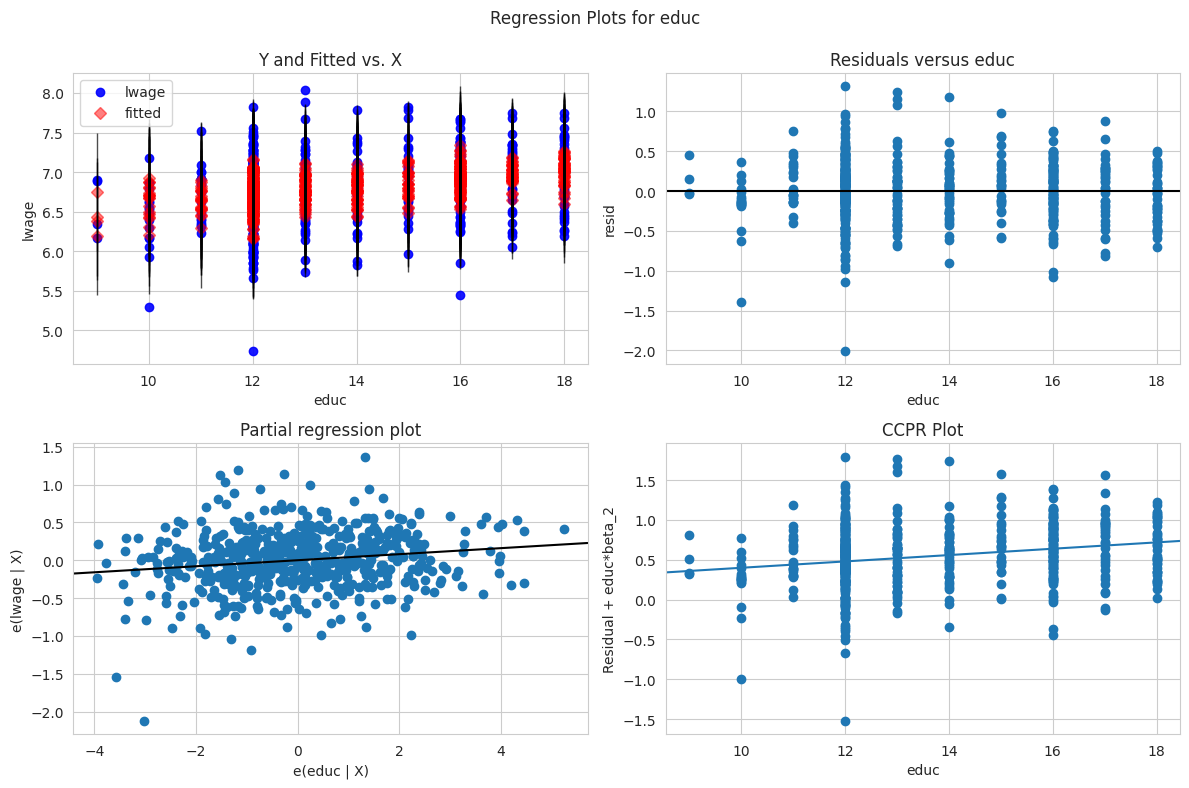

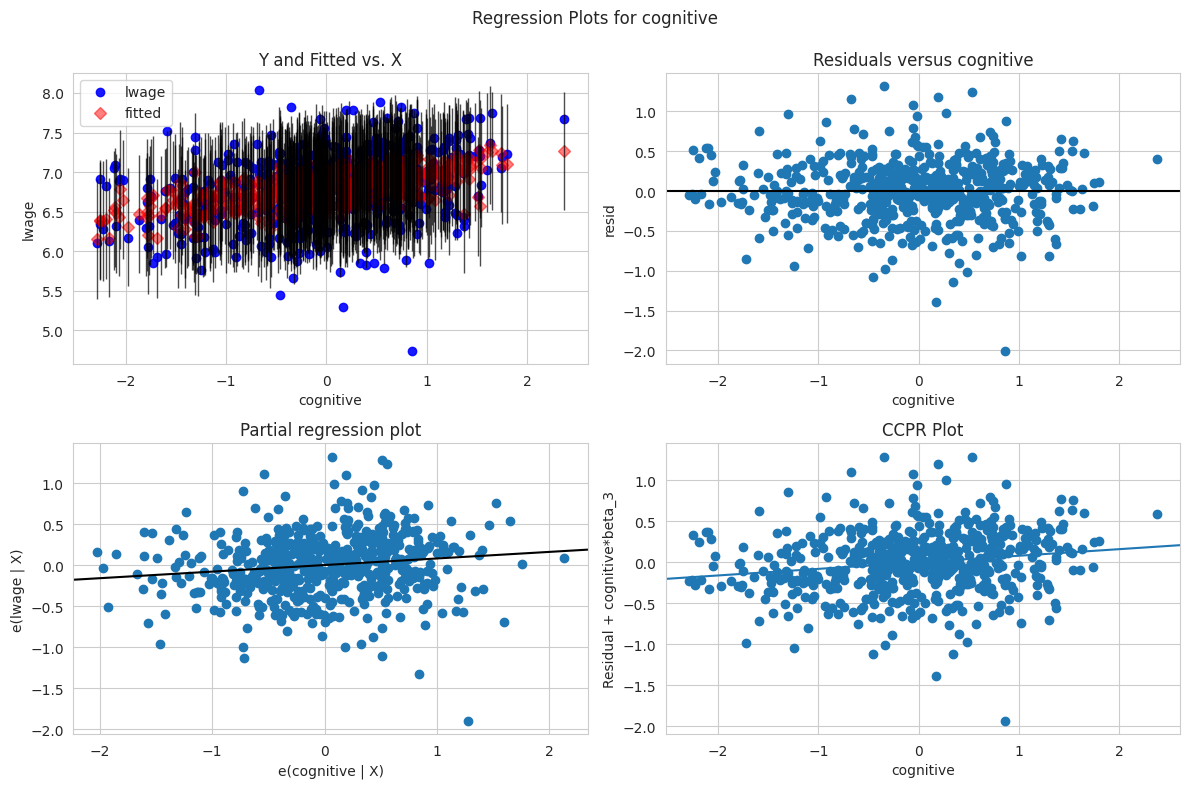

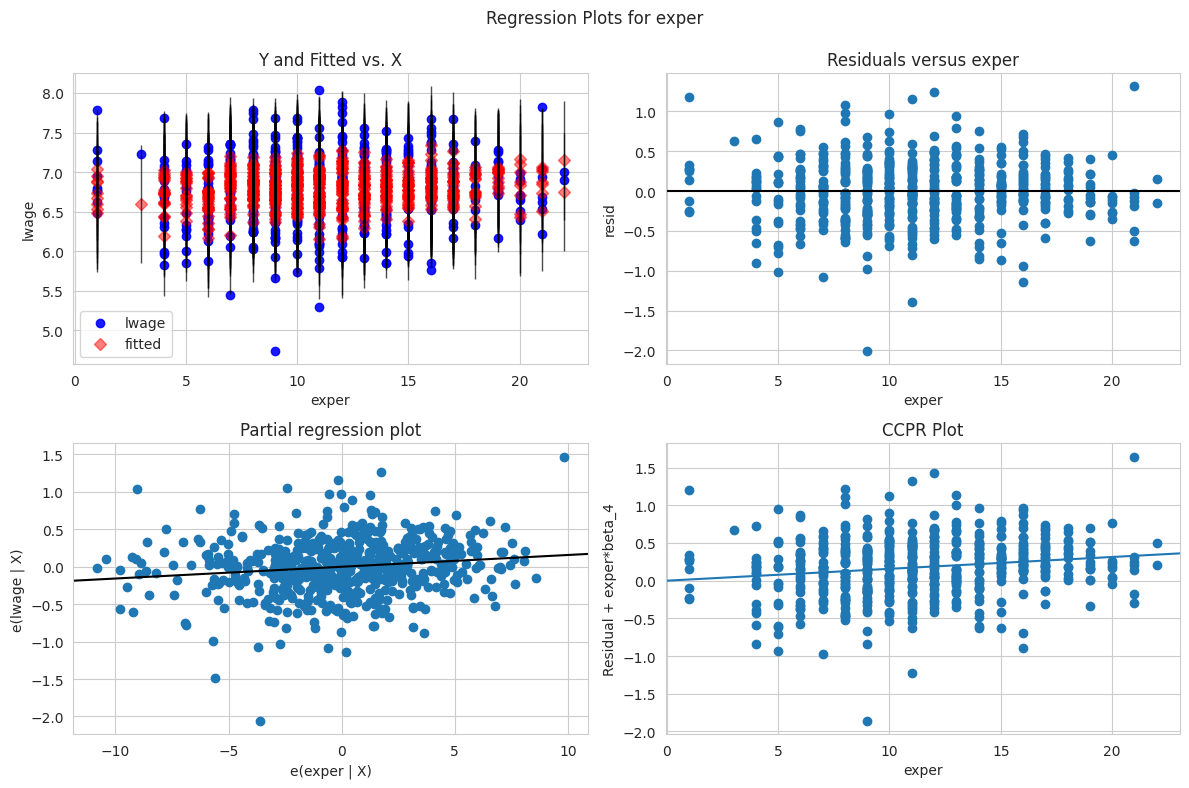

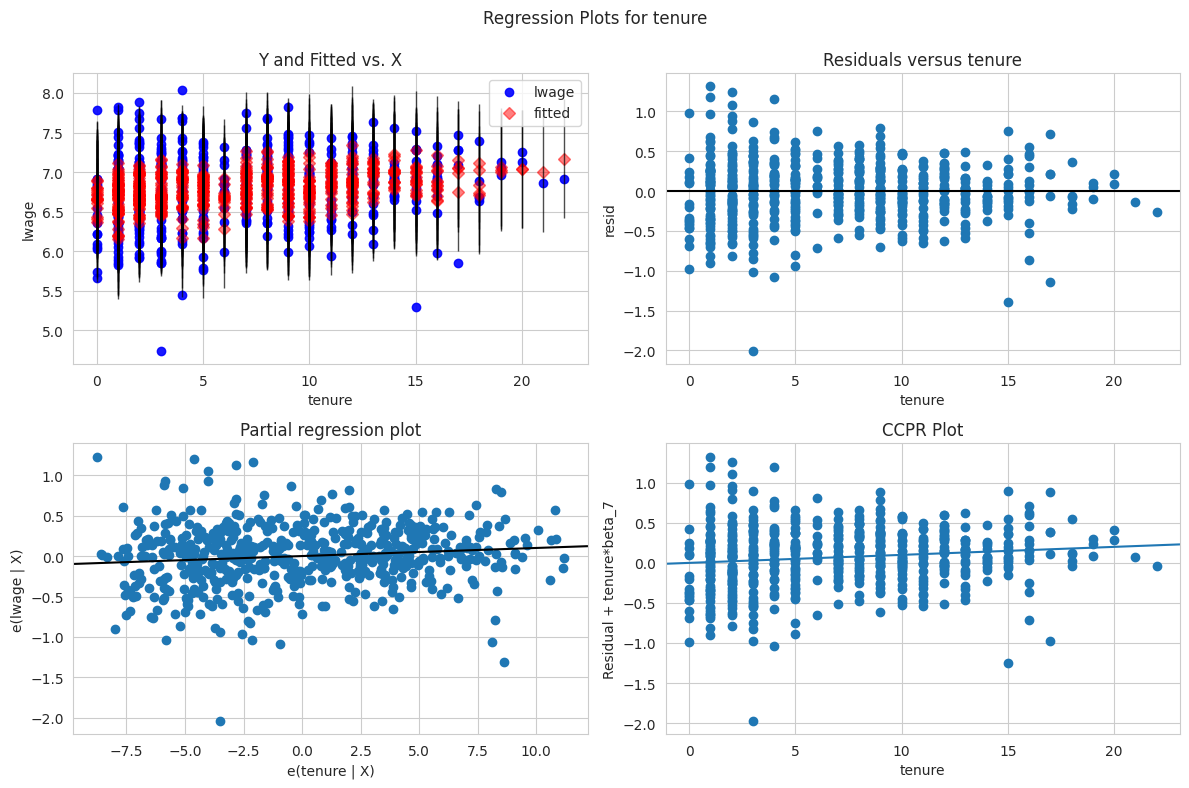

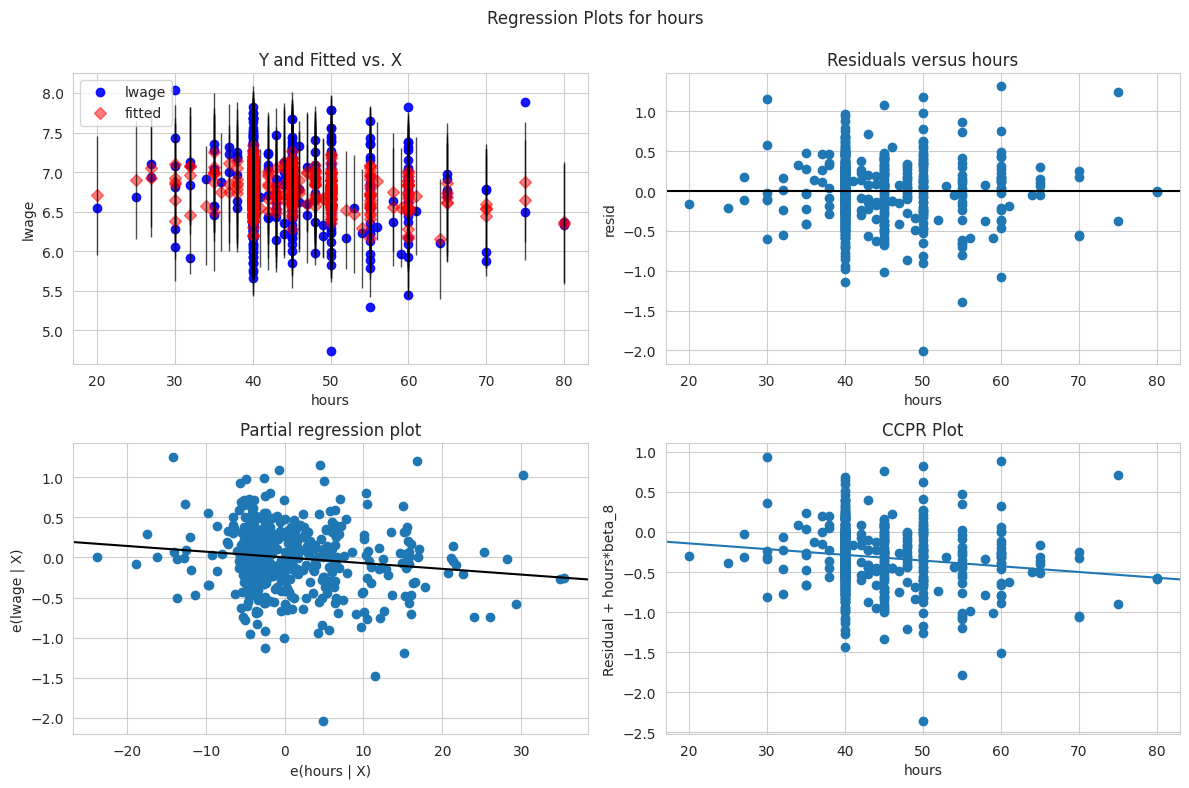

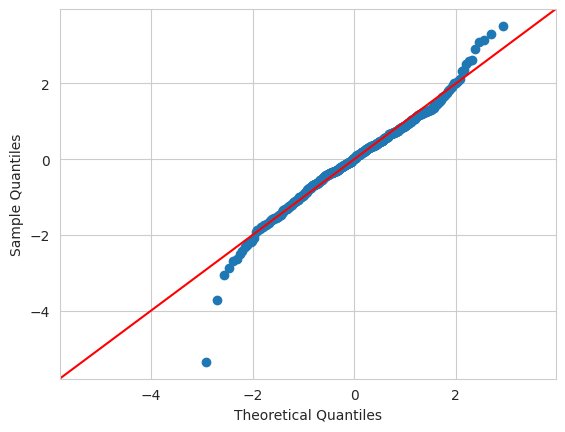

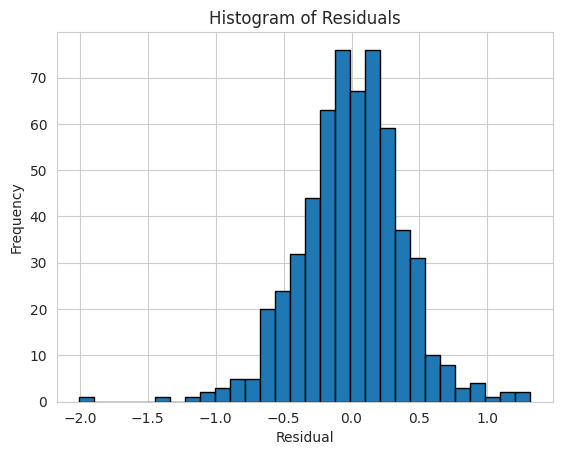

Jarque-Bera statistic: 104.79765563258528
p-value: 1.7517745847608768e-23
Skewness: -0.2549582102254226
Kurtosis: 5.024595396196548


In [ ]:
X_train_sel4 = X_train[['peduc', 'educ', 'cognitive', 'exper', 'urban', 'married', 'tenure','hours']]
X_train_sel4 = sm.add_constant(X_train_sel4)
model4 = sm.OLS(y_train, X_train_sel4).fit()

print(model4.summary())
print(" ")

# ASSUMPTIONS

# Linearity
# Ramsey RESET test for linearity
model4.fittedvalues = model4.fittedvalues.to_numpy()
reset_result_4 = linear_reset(model4, power=2, use_f=True)
print("Ramsey RESET test (power=2):")
print("F-statistics: ", reset_result_4.fvalue)
print("p-value: ", reset_result_4.pvalue)

# Multicollinearity
X_train_vif_4 = X_train[['peduc', 'educ', 'cognitive', 'exper', 'urban', 'married', 'tenure', 'hours']]
X_train_vif_4 = sm.add_constant(X_train_vif_4)
vif_4 = pd.DataFrame()
vif_4['VIF'] = [variance_inflation_factor(X_train_vif_4.values, i)
                for i in range(X_train_vif_4.shape[1])]
vif_4['variable'] = X_train_vif_4.columns
print(' ')
print(vif_4)
print(" ")

# Homoskedasticity
print("Breusch-Pagan test:")
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_4 = sms.het_breuschpagan(model4.resid, model4.model.exog)

print(lzip(names, test_4))

# Regression plots for selected variables
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model4, 'peduc', fig=fig)

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model4, 'educ', fig=fig)

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model4, 'cognitive', fig=fig)

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model4, 'exper', fig=fig)

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model4, 'tenure', fig=fig)

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model4, 'hours', fig=fig)

# Normality of residuals
res_4 = model4.resid
fig = sm.qqplot(res_4, fit=True, line="45")
plt.show()

plt.hist(res_4, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Jarque-Bera test
jb_stat_4, jb_pvalue_4, skew_4, kurtosis_4 = sm.stats.jarque_bera(res_4)

print("Jarque-Bera statistic:", jb_stat_4)
print("p-value:", jb_pvalue_4)
print("Skewness:", skew_4)
print("Kurtosis:", kurtosis_4)

# Prediction - final model

In [ ]:
# Predicting the values for the testing dataset
X_test_sel3 = X_test[['peduc','educ','IQ','exper','urban','married']]
X_test_sel3 = sm.add_constant(X_test_sel3)
y_pred = model3.predict(X_test_sel3)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) of the testing dataset:", mse)


Mean Squared Error (MSE) of the testing dataset: 0.090833389670377


# PARTIAL F-TEST


In [ ]:
anova_results = anova_lm(model, model1, model2, model3,model4)
print(anova_results)

   df_resid         ssr  df_diff   ss_diff          F        Pr(>F)
0     575.0  100.277147      0.0       NaN        NaN           NaN
1     573.0   94.521064      2.0  5.756083  20.253207  3.170479e-09
2     572.0   89.376693      1.0  5.144371  36.201706  3.177781e-09
3     570.0   83.531046      2.0  5.845647  20.568343  2.370842e-09
4     568.0   80.714504      2.0  2.816542   9.910214  5.880843e-05


# Regression tree

Mean Squared Error: 0.11666247977818917
R^2 Score: 0.18469148423026183
 


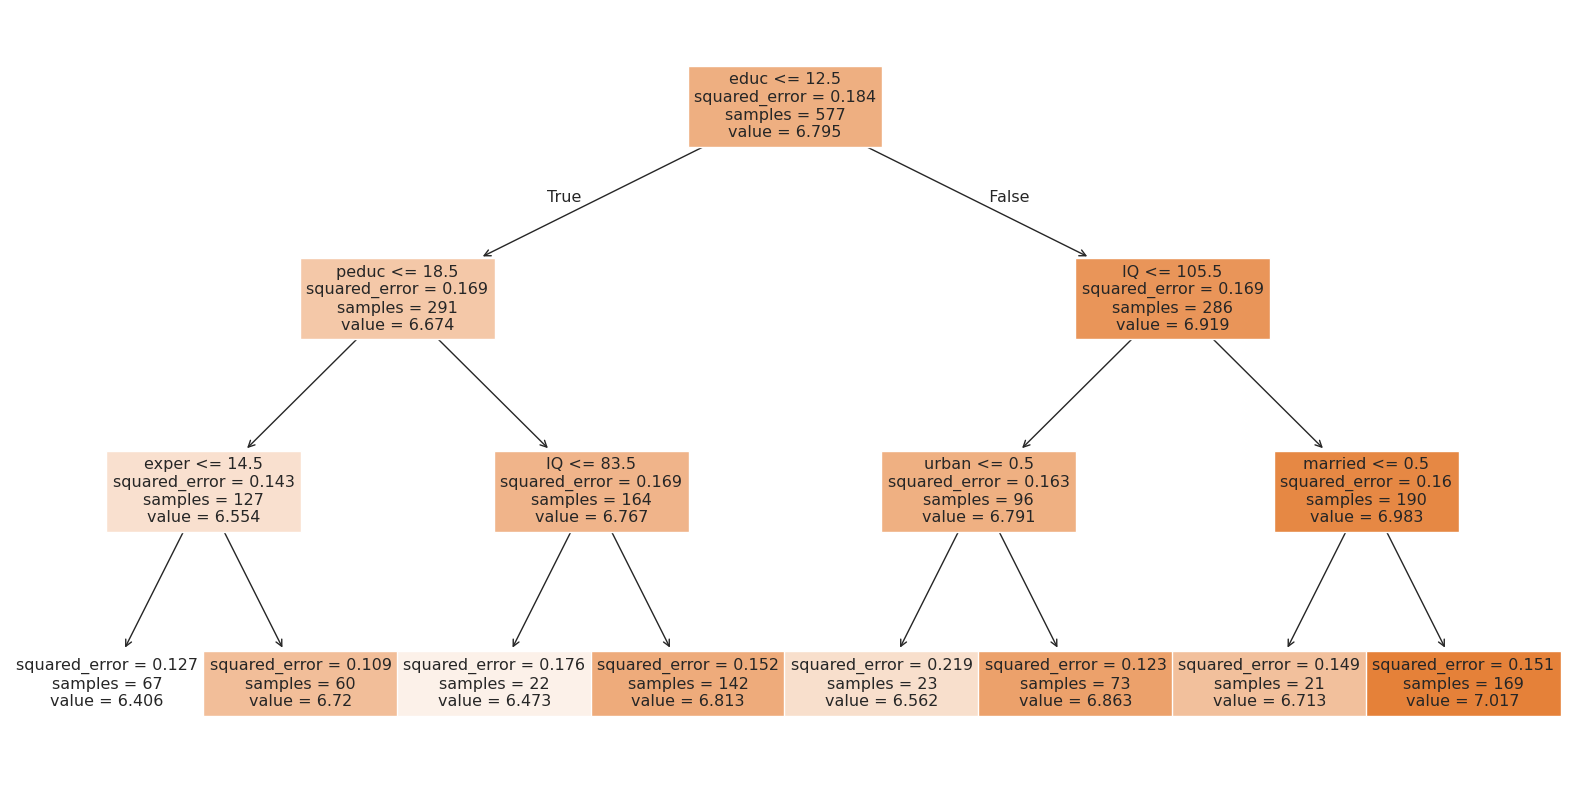

In [ ]:
y = df['lwage']
X = df[['peduc','educ', 'IQ','exper', 'urban', 'married']]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree regressor object with max_depth parameter
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)  # Adjust max_depth as needed

tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print(" ")
plt.figure(figsize=(20,10))

tree.plot_tree(tree_regressor, feature_names=X.columns, filled=True)
plt.show()


# K-fold Cross Validtion & KNN

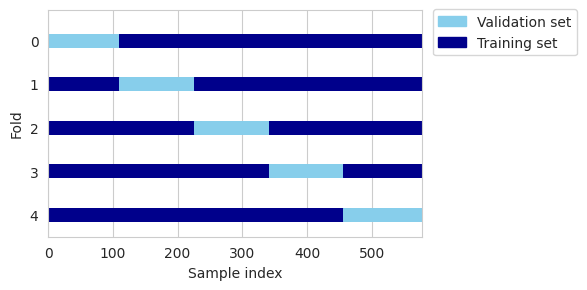

In [ ]:
def plot_kfold(cv, X, y, ax, n_splits, xlim_max=100):
    cv_split = cv.split(X=X, y=y)

    for i_split, (train_idx, val_idx) in enumerate(cv_split):
        # Create an array to mark each sample's color:
        indices = np.full(len(X), np.nan)
        indices[val_idx] = 1  # Validation
        indices[train_idx] = 0  # Training

        # Prepare x, y for scatter
        ax_x = range(len(indices))
        ax_y = [i_split + 0.5] * len(indices)

        # Convert numeric array (0 or 1) into color strings
        color_map = np.array(["darkblue", "skyblue"], dtype=object)
        # We need to cast indices to int so they become 0 or 1
        colors = color_map[indices.astype(int)]

        # Plot the training/validation indices
        ax.scatter(ax_x, ax_y, c=colors, marker="_", lw=10)

    # Set y-ticks and labels
    y_ticks = np.arange(n_splits) + 0.5
    ax.set(
        yticks=y_ticks,
        yticklabels=range(n_splits),
        xlabel="Sample index",
        ylabel="Fold",
        ylim=[n_splits, -0.2],
        xlim=[0, xlim_max]
    )
    legend_patches = [
        Patch(color="skyblue", label="Validation set"),
        Patch(color="darkblue", label="Training set")
    ]
    ax.legend(handles=legend_patches, loc=(1.03, 0.8))
kf = KFold(n_splits=5, shuffle=False)
fig, ax = plt.subplots(figsize=(6, 3))
n_splits = 5
plot_kfold(kf, X_train, y_train, ax, n_splits, xlim_max=len(X_train))
plt.tight_layout()
plt.show()


In [ ]:
# Chose K with the elbow method
def find_elbow(k_values, mse_values):

    # Convert to numpy arrays (just in case)
    k_values = np.array(k_values)
    mse_values = np.array(mse_values)

    # First and last points
    x1, y1 = k_values[0], mse_values[0]
    x2, y2 = k_values[-1], mse_values[-1]

    # Precompute the denominator for distance formula
    denom = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)

    distances = []
    for i in range(len(k_values)):
        x0, y0 = k_values[i], mse_values[i]
        # Formula for distance from point (x0, y0) to line (x1, y1)–(x2, y2)
        numerator = abs((y2 - y1)*x0 - (x2 - x1)*y0 + (x2*y1 - y2*x1))
        dist = numerator / denom
        distances.append(dist)

    distances = np.array(distances)

    # Find index of maximum distance
    elbow_idx = np.argmax(distances)
    elbow_k   = k_values[elbow_idx]

    return elbow_k, elbow_idx, distances

Fold sizes in 5-fold CV:
Fold 1: 461 training obs, 116 validation obs.
Fold 2: 461 training obs, 116 validation obs.
Fold 3: 462 training obs, 115 validation obs.
Fold 4: 462 training obs, 115 validation obs.
Fold 5: 462 training obs, 115 validation obs.


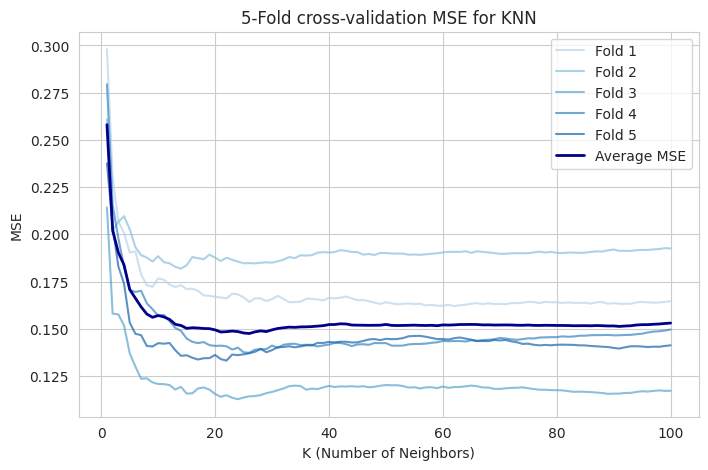

Using elbow based method, K = 9
Average MSE at K = elbow point with training set = 0.156
Test MSE at K=elbow with training set: 0.123


In [ ]:
X = df[['peduc','educ','IQ','exper','urban','married']]
y = df['lwage']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#Cross-validation loop
k_values = range(1, 101)
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_per_fold = np.zeros((len(k_values), n_splits))
print("Fold sizes in 5-fold CV:")
for fold_num, (train_idx, val_idx) in enumerate(kf.split(X_train), start=1):
    print(f"Fold {fold_num}: {len(train_idx)} training obs, {len(val_idx)} validation obs.")

for i, k in enumerate(k_values):
    knn = KNeighborsRegressor(n_neighbors=k)

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_train_cv = X_train[train_idx]
        X_val_cv   = X_train[val_idx]

        # If y is a Series, we index with .iloc
        y_train_cv = y_train.iloc[train_idx]
        y_val_cv   = y_train.iloc[val_idx]

        # Fit & predict
        knn.fit(X_train_cv, y_train_cv)
        y_val_pred = knn.predict(X_val_cv)

        mse_per_fold[i, fold_idx] = mean_squared_error(y_val_cv, y_val_pred)

#Average MSE across folds for each k
mse_avg = mse_per_fold.mean(axis=1)

#Plot the MSE curves
plt.figure(figsize=(8, 5))

#Create a range of blues (lighter to darker) for folds
colors = [cm.Blues(x) for x in np.linspace(0.3, 0.8, n_splits)]

for fold_idx in range(n_splits):
    label = f"Fold {fold_idx+1}"
    plt.plot(k_values, mse_per_fold[:, fold_idx],
             color=colors[fold_idx], alpha=0.7, label=label)

plt.plot(k_values, mse_avg, color='darkblue', label='Average MSE', linewidth=2.0)

plt.xlabel("K (Number of Neighbors)")
plt.ylabel("MSE")
plt.title("5-Fold cross-validation MSE for KNN")
plt.legend()
plt.show()

elbow_k, elbow_idx, distances = find_elbow(k_values, mse_avg)
print(f"Using elbow based method, K = {elbow_k}")
print(f"Average MSE at K = elbow point with training set = {mse_avg[elbow_idx]:.3f}")


#Training with K="elbow" point
knn_elbow = KNeighborsRegressor(n_neighbors=elbow_k)
knn_elbow.fit(X_train, y_train)

#Evaluating on test set
y_test_pred_elbow = knn_elbow.predict(X_test)
mse_test_elbow = mean_squared_error(y_test, y_test_pred_elbow)
print(f"Test MSE at K=elbow with training set: {mse_test_elbow:.3f}")


# Monte Carlo simulation 1:

Checking unbiasedness, consistency of OLS estimator under non-normal redsiduals





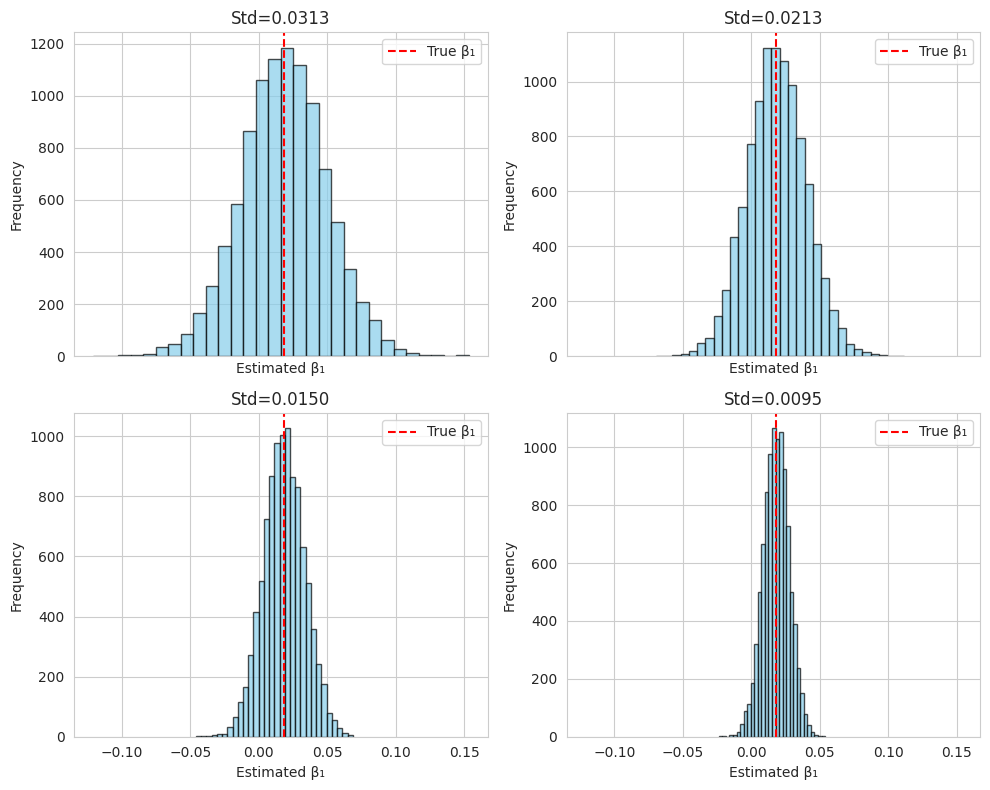

In [ ]:
#Monte Carlo simulation
np.random.seed(42)

def run_monte_carlo(R, n, beta_0, beta_1, error_type="heavy_tailed"):
    beta_hats = []
    for _ in range(R):
        X = np.random.normal(loc=21.06, scale=5.45, size=n)

        # Generate error term
        if error_type == "no_violation":
            u = np.random.normal(21.06, 5.45, n)
        elif error_type == "heavy_tailed":
            u = np.random.standard_t(df=8, size=n)
        else:
            raise ValueError("Invalid error_type specified.")

        Y = beta_0 + beta_1 * X + u

        X_ols = sm.add_constant(X)
        model = sm.OLS(Y, X_ols)
        results = model.fit()

        beta_hats.append(results.params[1])

    return np.array(beta_hats)

# Main parameters
beta_0 = 6.4091
beta_1 = 0.0182
error_type = "heavy_tailed"
R = 10000

sample_sizes = [50, 100, 200, 500]

all_betas = {}

#Run Monte Carlo for each sample size
for n in sample_sizes:
    beta_estimates = run_monte_carlo(R=R, n=n, beta_0=beta_0, beta_1=beta_1, error_type=error_type)
    all_betas[n] = beta_estimates

fig, axes = plt.subplots(2, 2, figsize=(10, 8),sharex=True)
axes = axes.ravel()  # Flatten into a 1D array for easier iteration

for i, n in enumerate(sample_sizes):
    ax = axes[i]
    betas_n = all_betas[n]

    ax.hist(betas_n, bins=30, alpha=0.7, color="skyblue", edgecolor="black")
    ax.axvline(beta_1, color="red", linestyle="--", label="True β₁")

    ax.set_title(f"Std={betas_n.std():.4f}")
    ax.set_xlabel("Estimated β₁")
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()

# Monte Carlo Simulation 2


Compare predictive perfomance of linear regerssion model vs K-nearest neighbors through MSE under non-normal residuals with K = 9

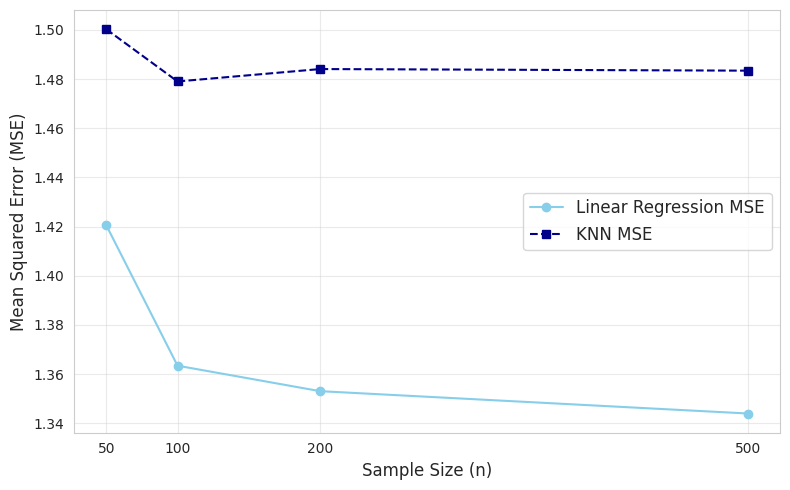

In [ ]:
# Monte Carlo Simulation Function with K-NN
np.random.seed(42)

def MC_estimation_with_knn(M, n, beta_0, beta_1, error_type="heavy_tailed", k_neighbors= 9 ):
    mse_linear = []
    mse_knn = []

    for _ in range(M):
        X = np.random.normal(21.06, 5.45, n)

        # Generate error term u
        if error_type == "no_violation":
            u = np.random.normal(21.06, 5.45, n)
        elif error_type == "heavy_tailed":
            u = np.random.standard_t(df=8, size=n)
        else:
            raise ValueError("Invalid error_type specified.")

        Y = beta_0 + beta_1 * X + u

        # Split data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)

        # Linear Regression
        X_train_ols = sm.add_constant(X_train)
        model = sm.OLS(Y_train, X_train_ols).fit()
        Y_pred_linear = model.predict(sm.add_constant(X_test))
        mse_linear.append(mean_squared_error(Y_test, Y_pred_linear))

        # K-Nearest Neighbors
        knn = KNeighborsRegressor(n_neighbors=k_neighbors)
        knn.fit(X_train, Y_train)
        Y_pred_knn = knn.predict(X_test)
        mse_knn.append(mean_squared_error(Y_test, Y_pred_knn))

    return {
        "MSE_Linear": np.mean(mse_linear),
        "MSE_KNN": np.mean(mse_knn),
    }

# Parameters
beta_0 = 6.4091
beta_1 = 0.0182

sample_sizes = [50, 100, 200, 500]
linear_mse = []
knn_mse = []

# Iterate over different sample sizes
for sample_size in sample_sizes:
    n = sample_size
    M = 10000
    error_type = "heavy_tailed"
    k_neighbors = 9

    # Run Simulation with K-NN
    results = MC_estimation_with_knn(M, n, beta_0, beta_1, error_type, k_neighbors)
    linear_mse.append(results['MSE_Linear'])
    knn_mse.append(results['MSE_KNN'])

# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, linear_mse, marker='o', linestyle='-', color='skyblue', label='Linear Regression MSE')
plt.plot(sample_sizes, knn_mse, marker='s', linestyle='--', color='darkblue', label='KNN MSE')

plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(sample_sizes)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

plt.show()


Compare predictive perfomance of linear regerssion model vs K-nearest neighbors through MSE under non-normal residuals with K = 26

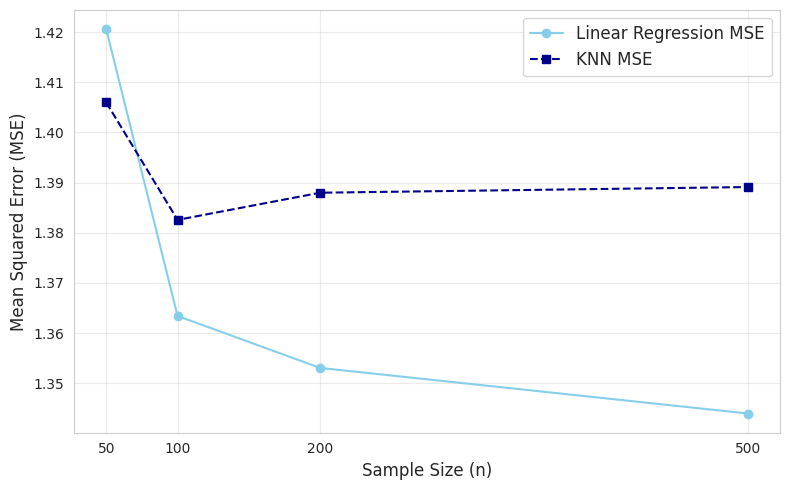

In [ ]:
# Monte Carlo Simulation Function with K-NN
np.random.seed(42)

def MC_estimation_with_knn(M, n, beta_0, beta_1, error_type="heavy_tailed", k_neighbors= 26 ):
    mse_linear = []
    mse_knn = []

    for _ in range(M):
        X = np.random.normal(21.06, 5.45, n)

        # Generate error term u
        if error_type == "no_violation":
            u = np.random.normal(21.06, 5.45, n)
        elif error_type == "heavy_tailed":
            u = np.random.standard_t(df=8, size=n)
        else:
            raise ValueError("Invalid error_type specified.")


        Y = beta_0 + beta_1 * X + u

        # Split data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)

        # Linear Regression
        X_train_ols = sm.add_constant(X_train)
        model = sm.OLS(Y_train, X_train_ols).fit()
        Y_pred_linear = model.predict(sm.add_constant(X_test))
        mse_linear.append(mean_squared_error(Y_test, Y_pred_linear))

        # K-Nearest Neighbors
        knn = KNeighborsRegressor(n_neighbors=k_neighbors)
        knn.fit(X_train, Y_train)
        Y_pred_knn = knn.predict(X_test)
        mse_knn.append(mean_squared_error(Y_test, Y_pred_knn))

    return {
        "MSE_Linear": np.mean(mse_linear),
        "MSE_KNN": np.mean(mse_knn),
    }

# Parameters
beta_0 = 6.4091
beta_1 = 0.0182

sample_sizes = [50, 100, 200, 500]
linear_mse = []
knn_mse = []

# Iterate over different sample sizes
for sample_size in sample_sizes:
    n = sample_size
    M = 10000
    error_type = "heavy_tailed"
    k_neighbors = 26

    # Run Simulation with K-NN
    results = MC_estimation_with_knn(M, n, beta_0, beta_1, error_type, k_neighbors)
    linear_mse.append(results['MSE_Linear'])
    knn_mse.append(results['MSE_KNN'])

# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, linear_mse, marker='o', linestyle='-', color='skyblue', label='Linear Regression MSE')
plt.plot(sample_sizes, knn_mse, marker='s', linestyle='--', color='darkblue', label='KNN MSE')

plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(sample_sizes)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

plt.show()


# Monte Carlo Simulation Study 3


Comparison for predictive performance between nonlinear regression model & KNN under violation of non-normal residuas with K = 9

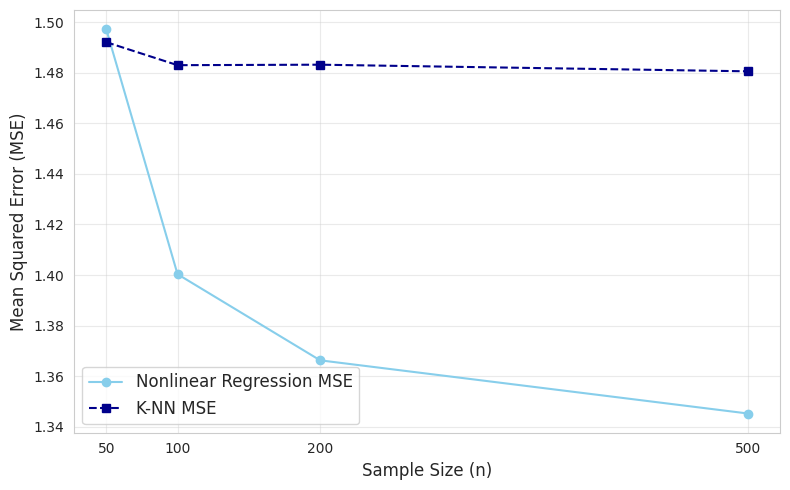

In [ ]:
# Monte Carlo Simulation Function with K-NN and Nonlinear Regression
np.random.seed(42)

def MC_estimation_with_knn_and_nonlinear(M, n, beta_0, beta_1, beta_2, error_type="heavy_tailed", k_neighbors=9):
    mse_nonlinear = []
    mse_knn = []

    for _ in range(M):
        X = np.random.normal(21.06, 5.45, n)

        # Generate error term u
        if error_type == "no_violation":
            u = np.random.normal(21.06, 5.45, n)
        elif error_type == "heavy_tailed":
            u = np.random.standard_t(df=8, size=n)
        else:
            raise ValueError("Invalid error_type specified.")

        # Generate Y with a nonlinear relationship
        Y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + u

        # Split data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)

        # Nonlinear Regression (OLS with quadratic term)
        X_train_nonlinear = np.hstack([X_train, X_train ** 2])
        X_test_nonlinear = np.hstack([X_test, X_test ** 2])
        model = sm.OLS(Y_train, sm.add_constant(X_train_nonlinear)).fit()
        Y_pred_nonlinear = model.predict(sm.add_constant(X_test_nonlinear))
        mse_nonlinear.append(mean_squared_error(Y_test, Y_pred_nonlinear))

        # K-Nearest Neighbors
        knn = KNeighborsRegressor(n_neighbors=k_neighbors)
        knn.fit(X_train, Y_train)
        Y_pred_knn = knn.predict(X_test)
        mse_knn.append(mean_squared_error(Y_test, Y_pred_knn))

    return {
        "MSE_Nonlinear": np.mean(mse_nonlinear),
        "MSE_KNN": np.mean(mse_knn),
    }

# Parameters
beta_0 = 6.4091
beta_1 = 0.0182
beta_2 = -0.0005

sample_sizes = [50, 100, 200, 500]
nonlinear_mse = []
knn_mse = []

# Iterate over different sample sizes
for sample_size in sample_sizes:
    n = sample_size
    M = 10000
    error_type = "heavy_tailed"
    k_neighbors = 9

    # Run Simulation with K-NN and Nonlinear Regression
    results = MC_estimation_with_knn_and_nonlinear(M, n, beta_0, beta_1, beta_2, error_type, k_neighbors)
    nonlinear_mse.append(results['MSE_Nonlinear'])
    knn_mse.append(results['MSE_KNN'])

# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, nonlinear_mse, marker='o', linestyle='-', color='skyblue', label='Nonlinear Regression MSE')
plt.plot(sample_sizes, knn_mse, marker='s', linestyle='--', color='darkblue', label='K-NN MSE')


plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(sample_sizes)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

plt.show()


Comparison for predictive performance between nonlinear regression model & KNN under violation of non-normal residuas with K = 26

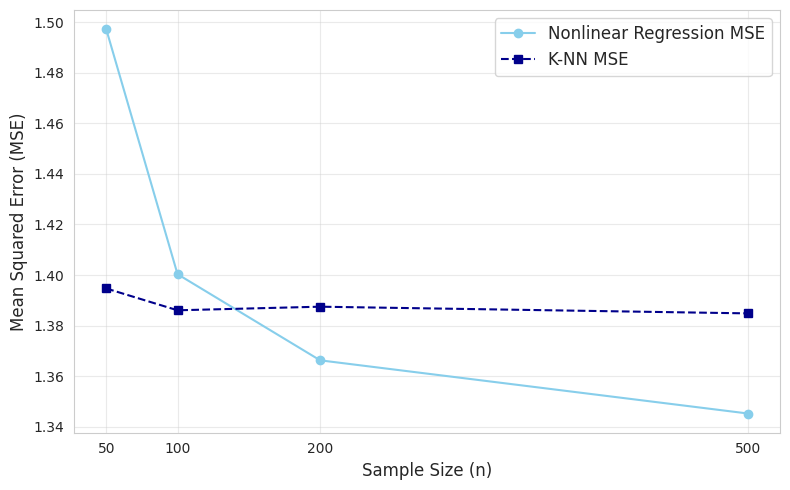

In [ ]:
# Monte Carlo Simulation Function with K-NN and Nonlinear Regression
np.random.seed(42)

def MC_estimation_with_knn_and_nonlinear(M, n, beta_0, beta_1, beta_2, error_type="heavy_tailed", k_neighbors=26):
    mse_nonlinear = []
    mse_knn = []

    for _ in range(M):
        X = np.random.normal(21.06, 5.45, n)

        # Generate error term u
        if error_type == "no_violation":
            u = np.random.normal(21.06, 5.45, n)
        elif error_type == "heavy_tailed":
            u = np.random.standard_t(df=8, size=n)
        else:
            raise ValueError("Invalid error_type specified.")

        # Generate Y with a nonlinear relationship
        Y = beta_0 + beta_1 * X + beta_2 * (X ** 2) + u

        # Split data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)

        # Nonlinear Regression (OLS with quadratic term)
        X_train_nonlinear = np.hstack([X_train, X_train ** 2])
        X_test_nonlinear = np.hstack([X_test, X_test ** 2])
        model = sm.OLS(Y_train, sm.add_constant(X_train_nonlinear)).fit()
        Y_pred_nonlinear = model.predict(sm.add_constant(X_test_nonlinear))
        mse_nonlinear.append(mean_squared_error(Y_test, Y_pred_nonlinear))

        # K-Nearest Neighbors
        knn = KNeighborsRegressor(n_neighbors=k_neighbors)
        knn.fit(X_train, Y_train)
        Y_pred_knn = knn.predict(X_test)
        mse_knn.append(mean_squared_error(Y_test, Y_pred_knn))

    return {
        "MSE_Nonlinear": np.mean(mse_nonlinear),
        "MSE_KNN": np.mean(mse_knn),
    }

# Parameters
beta_0 = 6.4091
beta_1 = 0.0182
beta_2 = -0.0005

sample_sizes = [50, 100, 200, 500]
nonlinear_mse = []
knn_mse = []

# Iterate over different sample sizes
for sample_size in sample_sizes:
    n = sample_size
    M = 10000
    error_type = "heavy_tailed"
    k_neighbors = 26

    # Run Simulation with K-NN and Nonlinear Regression
    results = MC_estimation_with_knn_and_nonlinear(M, n, beta_0, beta_1, beta_2, error_type, k_neighbors)
    nonlinear_mse.append(results['MSE_Nonlinear'])
    knn_mse.append(results['MSE_KNN'])

# Plot Results
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, nonlinear_mse, marker='o', linestyle='-', color='skyblue', label='Nonlinear Regression MSE')
plt.plot(sample_sizes, knn_mse, marker='s', linestyle='--', color='darkblue', label='K-NN MSE')


plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(sample_sizes)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

plt.show()
